# Step1: Get all stocks

go to: https://www.nasdaq.com/market-activity/stocks/screener


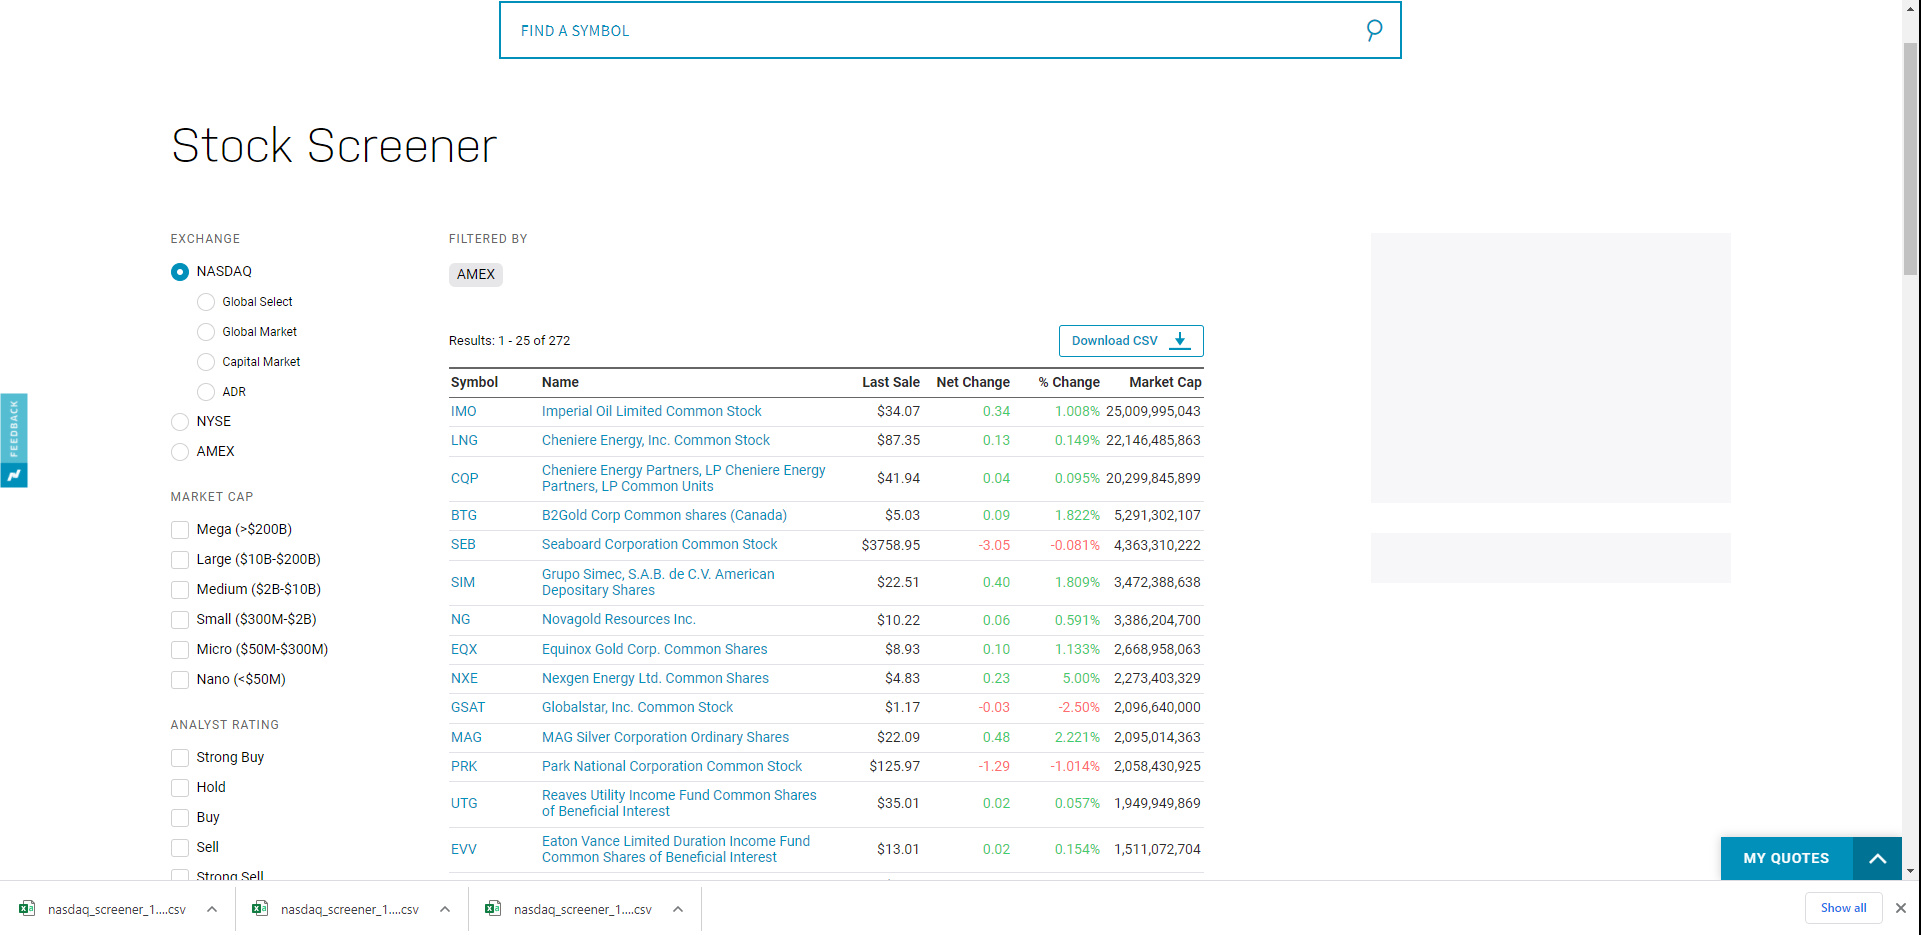

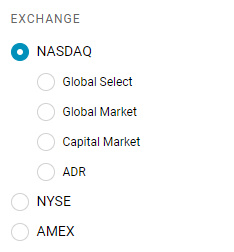

Download the following:
   - NASDAQ
   - NYSE
   - AMEX

In [2]:
import pandas as pd
from collections import Counter
import bs4 as bs
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import datetime as dt

def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)

In [3]:
df_NDX = pd.read_csv("../dataset_orig/NASDAQ list.csv")
df_NSE = pd.read_csv("../dataset_orig/NYSE list.csv")
df_AMEX = pd.read_csv("../dataset_orig/AMEX list.csv")


In [4]:
df = pd.concat([df_NDX, df_NSE, df_AMEX],axis=0)

In [5]:
df

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$3.24,0.0000,0.00%,1.027118e+08,China,NaN,238259,Miscellaneous,Service to the Health Industry
1,AACQ,Artius Acquisition Inc. Class A Common Stock,$9.97,0.0100,0.10%,9.029081e+08,United States,2020.0,1236287,Basic Industries,Major Chemicals
2,AACQU,Artius Acquisition Inc. Unit,$10.59,0.0013,0.012%,0.000000e+00,United States,2020.0,2009,Basic Industries,Major Chemicals
3,AACQW,Artius Acquisition Inc Warrant,$1.94,0.0400,2.105%,0.000000e+00,United States,2020.0,122163,Basic Industries,Major Chemicals
4,AAL,American Airlines Group Inc. Common Stock,$24.30,-0.6300,-2.527%,1.558561e+10,United States,NaN,28898070,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...,...,...,...,...
267,XXII,22nd Century Group Inc. Common Stock,$4.63,0.0300,0.652%,7.058165e+08,United States,NaN,1160848,Consumer Non-Durables,Farming/Seeds/Milling
268,YCBD,cbdMD Inc. Common Stock,$3.04,-0.0500,-1.618%,1.732209e+08,United States,2017.0,134453,Health Care,Major Pharmaceuticals
269,YCBD^A,cbdMD Inc. 8.0% Series A Cumulative Convertibl...,$8.68,0.0000,0.00%,NaN,United States,NaN,1949,NaN,NaN
270,ZDGE,Zedge Inc. Class B Common Stock,$14.44,0.3100,2.194%,1.953978e+08,NaN,2016.0,180619,Technology,Computer Software: Prepackaged Software


# Drop all Duplicates and Check

In [6]:
df.drop_duplicates('Symbol',inplace = True)

In [7]:
Counter(df['Symbol']).most_common

<bound method Counter.most_common of Counter({'AACG': 1, 'AACQ': 1, 'AACQU': 1, 'AACQW': 1, 'AAL': 1, 'AAME': 1, 'AAOI': 1, 'AAON': 1, 'AAPL': 1, 'AAWW': 1, 'ABCB': 1, 'ABCL': 1, 'ABCM': 1, 'ABEO': 1, 'ABGI': 1, 'ABIO': 1, 'ABMD': 1, 'ABNB': 1, 'ABST': 1, 'ABTX': 1, 'ABUS': 1, 'ACAC': 1, 'ACACU': 1, 'ACACW': 1, 'ACAD': 1, 'ACAH': 1, 'ACAHU': 1, 'ACAHW': 1, 'ACB': 1, 'ACBA': 1, 'ACBAU': 1, 'ACBAW': 1, 'ACBI': 1, 'ACCD': 1, 'ACER': 1, 'ACET': 1, 'ACEV': 1, 'ACEVU': 1, 'ACEVW': 1, 'ACGL': 1, 'ACGLO': 1, 'ACGLP': 1, 'ACHC': 1, 'ACHL': 1, 'ACHV': 1, 'ACIU': 1, 'ACIW': 1, 'ACKIT': 1, 'ACKIU': 1, 'ACKIW': 1, 'ACLS': 1, 'ACMR': 1, 'ACNB': 1, 'ACOR': 1, 'ACQR': 1, 'ACQRU': 1, 'ACQRW': 1, 'ACRS': 1, 'ACRX': 1, 'ACST': 1, 'ACTC': 1, 'ACTCU': 1, 'ACTCW': 1, 'ACTD': 1, 'ACTDU': 1, 'ACTDW': 1, 'ACTG': 1, 'ACVA': 1, 'ADAG': 1, 'ADAP': 1, 'ADBE': 1, 'ADER': 1, 'ADERU': 1, 'ADERW': 1, 'ADES': 1, 'ADI': 1, 'ADIL': 1, 'ADILW': 1, 'ADMA': 1, 'ADMP': 1, 'ADMS': 1, 'ADN': 1, 'ADNWW': 1, 'ADOC': 1, 'ADOCR': 

# Download all Data

In [8]:

count = 1
today_date = dt.datetime.now().strftime('%Y-%m-%d')
today_date
import os
os.makedirs('./ticker_data/ticker_data_Daily_{}'.format(today_date))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './ticker_data/ticker_data_Daily_2021-12-11'

In [9]:
completed_download = []
unable_to_download = []

import time

# tick_to_Try = ['GOOGL']
time_sleep_count = 0
for ticker in df['Symbol']:#shorten
    time_sleep_count+=1
    if time_sleep_count == 3:
#         time.sleep(1.8)
#         print('sleeping....')
        time_sleep_count = 0
        
    try:
        print('Ticker: {}'.format(ticker))
        count+=1
        data = yf.download(ticker, start="2000-01-01", end=today_date,threads = False)#thread=True gives error
        data.to_csv('./ticker_data/ticker_data_Daily_{}/{}_ended_{}.csv'.format(today_date, ticker, today_date))
        completed_download.append(ticker)
        print('[{} Out Of {}] Done'.format(count, len(df)))
    except:
        print('Unable Ticker: {}'.format(ticker))


Ticker: AACG
[*********************100%***********************]  1 of 1 completed
[2 Out Of 7642] Done
Ticker: AACQ
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACQ: No data found, symbol may be delisted
[3 Out Of 7642] Done
Ticker: AACQU
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACQU: No data found, symbol may be delisted
[4 Out Of 7642] Done
Ticker: AACQW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACQW: No data found, symbol may be delisted
[5 Out Of 7642] Done
Ticker: AAL
[*********************100%***********************]  1 of 1 completed
[6 Out Of 7642] Done
Ticker: AAME
[*********************100%***********************]  1 of 1 completed
[7 Out Of 7642] Done
Ticker: AAOI
[*********************100%***********************]  1 of 1 completed
[8 Out Of 7642] Done
Ticker: AAON
[*********************100%***********************]  1 of 1 comple

[*********************100%***********************]  1 of 1 completed
[75 Out Of 7642] Done
Ticker: ADES
[*********************100%***********************]  1 of 1 completed
[76 Out Of 7642] Done
Ticker: ADI
[*********************100%***********************]  1 of 1 completed
[77 Out Of 7642] Done
Ticker: ADIL
[*********************100%***********************]  1 of 1 completed
[78 Out Of 7642] Done
Ticker: ADILW
[*********************100%***********************]  1 of 1 completed
[79 Out Of 7642] Done
Ticker: ADMA
[*********************100%***********************]  1 of 1 completed
[80 Out Of 7642] Done
Ticker: ADMP
[*********************100%***********************]  1 of 1 completed
[81 Out Of 7642] Done
Ticker: ADMS
[*********************100%***********************]  1 of 1 completed
[82 Out Of 7642] Done
Ticker: ADN
[*********************100%***********************]  1 of 1 completed
[83 Out Of 7642] Done
Ticker: ADNWW
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AHACW: No data found, symbol may be delisted
[152 Out Of 7642] Done
Ticker: AHCO
[*********************100%***********************]  1 of 1 completed
[153 Out Of 7642] Done
Ticker: AHPI
[*********************100%***********************]  1 of 1 completed
[154 Out Of 7642] Done
Ticker: AIH
[*********************100%***********************]  1 of 1 completed
[155 Out Of 7642] Done
Ticker: AIHS
[*********************100%***********************]  1 of 1 completed
[156 Out Of 7642] Done
Ticker: AIKI
[*********************100%***********************]  1 of 1 completed
[157 Out Of 7642] Done
Ticker: AIMC
[*********************100%***********************]  1 of 1 completed
[158 Out Of 7642] Done
Ticker: AINV
[*********************100%***********************]  1 of 1 completed
[159 Out Of 7642] Done
Ticker: AIRG
[*********************100%***********************]  1 of 1 completed
[160 Out Of 7642] Done
Ti

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMHCW: No data found, symbol may be delisted
[227 Out Of 7642] Done
Ticker: AMKR
[*********************100%***********************]  1 of 1 completed
[228 Out Of 7642] Done
Ticker: AMNB
[*********************100%***********************]  1 of 1 completed
[229 Out Of 7642] Done
Ticker: AMOT
[*********************100%***********************]  1 of 1 completed
[230 Out Of 7642] Done
Ticker: AMPG
[*********************100%***********************]  1 of 1 completed
[231 Out Of 7642] Done
Ticker: AMPGW
[*********************100%***********************]  1 of 1 completed
[232 Out Of 7642] Done
Ticker: AMPH
[*********************100%***********************]  1 of 1 completed
[233 Out Of 7642] Done
Ticker: AMRB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMRB: No data found, symbol may be delisted
[234 Out Of 7642] Done
Ticker: AMRK
[*********************100%

[*********************100%***********************]  1 of 1 completed
[299 Out Of 7642] Done
Ticker: AQMS
[*********************100%***********************]  1 of 1 completed
[300 Out Of 7642] Done
Ticker: AQST
[*********************100%***********************]  1 of 1 completed
[301 Out Of 7642] Done
Ticker: ARAV
[*********************100%***********************]  1 of 1 completed
[302 Out Of 7642] Done
Ticker: ARAY
[*********************100%***********************]  1 of 1 completed
[303 Out Of 7642] Done
Ticker: ARBG
[*********************100%***********************]  1 of 1 completed
[304 Out Of 7642] Done
Ticker: ARBGU
[*********************100%***********************]  1 of 1 completed
[305 Out Of 7642] Done
Ticker: ARBGW
[*********************100%***********************]  1 of 1 completed
[306 Out Of 7642] Done
Ticker: ARCB
[*********************100%***********************]  1 of 1 completed
[307 Out Of 7642] Done
Ticker: ARCC
[*********************100%***********************]  1

[*********************100%***********************]  1 of 1 completed
[374 Out Of 7642] Done
Ticker: ATNFW
[*********************100%***********************]  1 of 1 completed
[375 Out Of 7642] Done
Ticker: ATNI
[*********************100%***********************]  1 of 1 completed
[376 Out Of 7642] Done
Ticker: ATNX
[*********************100%***********************]  1 of 1 completed
[377 Out Of 7642] Done
Ticker: ATOM
[*********************100%***********************]  1 of 1 completed
[378 Out Of 7642] Done
Ticker: ATOS
[*********************100%***********************]  1 of 1 completed
[379 Out Of 7642] Done
Ticker: ATRA
[*********************100%***********************]  1 of 1 completed
[380 Out Of 7642] Done
Ticker: ATRC
[*********************100%***********************]  1 of 1 completed
[381 Out Of 7642] Done
Ticker: ATRI
[*********************100%***********************]  1 of 1 completed
[382 Out Of 7642] Done
Ticker: ATRO
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
[451 Out Of 7642] Done
Ticker: BBGI
[*********************100%***********************]  1 of 1 completed
[452 Out Of 7642] Done
Ticker: BBI
[*********************100%***********************]  1 of 1 completed
[453 Out Of 7642] Done
Ticker: BBIG
[*********************100%***********************]  1 of 1 completed
[454 Out Of 7642] Done
Ticker: BBIO
[*********************100%***********************]  1 of 1 completed
[455 Out Of 7642] Done
Ticker: BBQ
[*********************100%***********************]  1 of 1 completed
[456 Out Of 7642] Done
Ticker: BBSI
[*********************100%***********************]  1 of 1 completed
[457 Out Of 7642] Done
Ticker: BCAB
[*********************100%***********************]  1 of 1 completed
[458 Out Of 7642] Done
Ticker: BCAC
[*********************100%***********************]  1 of 1 completed
[459 Out Of 7642] Done
Ticker: BCACU
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
[528 Out Of 7642] Done
Ticker: BKSC
[*********************100%***********************]  1 of 1 completed
[529 Out Of 7642] Done
Ticker: BKYI
[*********************100%***********************]  1 of 1 completed
[530 Out Of 7642] Done
Ticker: BL
[*********************100%***********************]  1 of 1 completed
[531 Out Of 7642] Done
Ticker: BLBD
[*********************100%***********************]  1 of 1 completed
[532 Out Of 7642] Done
Ticker: BLCM
[*********************100%***********************]  1 of 1 completed
[533 Out Of 7642] Done
Ticker: BLCT
[*********************100%***********************]  1 of 1 completed
[534 Out Of 7642] Done
Ticker: BLDE
[*********************100%***********************]  1 of 1 completed
[535 Out Of 7642] Done
Ticker: BLDEW
[*********************100%***********************]  1 of 1 completed
[536 Out Of 7642] Done
Ticker: BLDP
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
[600 Out Of 7642] Done
Ticker: BRIVU
[*********************100%***********************]  1 of 1 completed
[601 Out Of 7642] Done
Ticker: BRKL
[*********************100%***********************]  1 of 1 completed
[602 Out Of 7642] Done
Ticker: BRKR
[*********************100%***********************]  1 of 1 completed
[603 Out Of 7642] Done
Ticker: BRKS
[*********************100%***********************]  1 of 1 completed
[604 Out Of 7642] Done
Ticker: BRLI
[*********************100%***********************]  1 of 1 completed
[605 Out Of 7642] Done
Ticker: BRLIR
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRLIR: None
[606 Out Of 7642] Done
Ticker: BRLIW
[*********************100%***********************]  1 of 1 completed
[607 Out Of 7642] Done
Ticker: BROG
[*********************100%***********************]  1 of 1 completed
[608 Out Of 7642] Done
Ticker: BROGW
[****************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CAPAW: No data found, symbol may be delisted
[674 Out Of 7642] Done
Ticker: CAPR
[*********************100%***********************]  1 of 1 completed
[675 Out Of 7642] Done
Ticker: CAR
[*********************100%***********************]  1 of 1 completed
[676 Out Of 7642] Done
Ticker: CARA
[*********************100%***********************]  1 of 1 completed
[677 Out Of 7642] Done
Ticker: CARE
[*********************100%***********************]  1 of 1 completed
[678 Out Of 7642] Done
Ticker: CARG
[*********************100%***********************]  1 of 1 completed
[679 Out Of 7642] Done
Ticker: CARV
[*********************100%***********************]  1 of 1 completed
[680 Out Of 7642] Done
Ticker: CASA
[*********************100%***********************]  1 of 1 completed
[681 Out Of 7642] Done
Ticker: CASH
[*********************100%***********************]  1 of 1 completed
[682 Out Of 7642] Done
Ti

[*********************100%***********************]  1 of 1 completed
[746 Out Of 7642] Done
Ticker: CEVA
[*********************100%***********************]  1 of 1 completed
[747 Out Of 7642] Done
Ticker: CFAC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CFAC: No data found, symbol may be delisted
[748 Out Of 7642] Done
Ticker: CFACU
[*********************100%***********************]  1 of 1 completed
[749 Out Of 7642] Done
Ticker: CFACW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CFACW: No data found, symbol may be delisted
[750 Out Of 7642] Done
Ticker: CFB
[*********************100%***********************]  1 of 1 completed
[751 Out Of 7642] Done
Ticker: CFBK
[*********************100%***********************]  1 of 1 completed
[752 Out Of 7642] Done
Ticker: CFFE
[*********************100%***********************]  1 of 1 completed
[753 Out Of 7642] Done
Ticker: CFFEU
[*********************100

[*********************100%***********************]  1 of 1 completed
[823 Out Of 7642] Done
Ticker: CLFD
[*********************100%***********************]  1 of 1 completed
[824 Out Of 7642] Done
Ticker: CLGN
[*********************100%***********************]  1 of 1 completed
[825 Out Of 7642] Done
Ticker: CLIR
[*********************100%***********************]  1 of 1 completed
[826 Out Of 7642] Done
Ticker: CLLS
[*********************100%***********************]  1 of 1 completed
[827 Out Of 7642] Done
Ticker: CLMT
[*********************100%***********************]  1 of 1 completed
[828 Out Of 7642] Done
Ticker: CLNE
[*********************100%***********************]  1 of 1 completed
[829 Out Of 7642] Done
Ticker: CLNN
[*********************100%***********************]  1 of 1 completed
[830 Out Of 7642] Done
Ticker: CLNNW
[*********************100%***********************]  1 of 1 completed
[831 Out Of 7642] Done
Ticker: CLOV
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
[896 Out Of 7642] Done
Ticker: COLI
[*********************100%***********************]  1 of 1 completed
[897 Out Of 7642] Done
Ticker: COLIU
[*********************100%***********************]  1 of 1 completed
[898 Out Of 7642] Done
Ticker: COLIW
[*********************100%***********************]  1 of 1 completed
[899 Out Of 7642] Done
Ticker: COLL
[*********************100%***********************]  1 of 1 completed
[900 Out Of 7642] Done
Ticker: COLM
[*********************100%***********************]  1 of 1 completed
[901 Out Of 7642] Done
Ticker: COMM
[*********************100%***********************]  1 of 1 completed
[902 Out Of 7642] Done
Ticker: COMS
[*********************100%***********************]  1 of 1 completed
[903 Out Of 7642] Done
Ticker: COMSW
[*********************100%***********************]  1 of 1 completed
[904 Out Of 7642] Done
Ticker: CONE
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
[970 Out Of 7642] Done
Ticker: CSCW
[*********************100%***********************]  1 of 1 completed
[971 Out Of 7642] Done
Ticker: CSGP
[*********************100%***********************]  1 of 1 completed
[972 Out Of 7642] Done
Ticker: CSGS
[*********************100%***********************]  1 of 1 completed
[973 Out Of 7642] Done
Ticker: CSII
[*********************100%***********************]  1 of 1 completed
[974 Out Of 7642] Done
Ticker: CSIQ
[*********************100%***********************]  1 of 1 completed
[975 Out Of 7642] Done
Ticker: CSOD
[*********************100%***********************]  1 of 1 completed
[976 Out Of 7642] Done
Ticker: CSPI
[*********************100%***********************]  1 of 1 completed
[977 Out Of 7642] Done
Ticker: CSQ
[*********************100%***********************]  1 of 1 completed
[978 Out Of 7642] Done
Ticker: CSSE
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
[1047 Out Of 7642] Done
Ticker: DAKT
[*********************100%***********************]  1 of 1 completed
[1048 Out Of 7642] Done
Ticker: DARE
[*********************100%***********************]  1 of 1 completed
[1049 Out Of 7642] Done
Ticker: DAWN
[*********************100%***********************]  1 of 1 completed
[1050 Out Of 7642] Done
Ticker: DBDR
[*********************100%***********************]  1 of 1 completed
[1051 Out Of 7642] Done
Ticker: DBDRU
[*********************100%***********************]  1 of 1 completed
[1052 Out Of 7642] Done
Ticker: DBDRW
[*********************100%***********************]  1 of 1 completed
[1053 Out Of 7642] Done
Ticker: DBGI
[*********************100%***********************]  1 of 1 completed
[1054 Out Of 7642] Done
Ticker: DBGIW
[*********************100%***********************]  1 of 1 completed
[1055 Out Of 7642] Done
Ticker: DBTX
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
[1120 Out Of 7642] Done
Ticker: DLTH
[*********************100%***********************]  1 of 1 completed
[1121 Out Of 7642] Done
Ticker: DLTR
[*********************100%***********************]  1 of 1 completed
[1122 Out Of 7642] Done
Ticker: DMAC
[*********************100%***********************]  1 of 1 completed
[1123 Out Of 7642] Done
Ticker: DMLP
[*********************100%***********************]  1 of 1 completed
[1124 Out Of 7642] Done
Ticker: DMRC
[*********************100%***********************]  1 of 1 completed
[1125 Out Of 7642] Done
Ticker: DMTK
[*********************100%***********************]  1 of 1 completed
[1126 Out Of 7642] Done
Ticker: DNLI
[*********************100%***********************]  1 of 1 completed
[1127 Out Of 7642] Done
Ticker: DOCU
[*********************100%***********************]  1 of 1 completed
[1128 Out Of 7642] Done
Ticker: DOGZ
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
[1196 Out Of 7642] Done
Ticker: EDIT
[*********************100%***********************]  1 of 1 completed
[1197 Out Of 7642] Done
Ticker: EDRY
[*********************100%***********************]  1 of 1 completed
[1198 Out Of 7642] Done
Ticker: EDSA
[*********************100%***********************]  1 of 1 completed
[1199 Out Of 7642] Done
Ticker: EDTK
[*********************100%***********************]  1 of 1 completed
[1200 Out Of 7642] Done
Ticker: EDTX
[*********************100%***********************]  1 of 1 completed
[1201 Out Of 7642] Done
Ticker: EDTXU
[*********************100%***********************]  1 of 1 completed
[1202 Out Of 7642] Done
Ticker: EDTXW
[*********************100%***********************]  1 of 1 completed
[1203 Out Of 7642] Done
Ticker: EDUC
[*********************100%***********************]  1 of 1 completed
[1204 Out Of 7642] Done
Ticker: EEFT
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
[1273 Out Of 7642] Done
Ticker: ESEA
[*********************100%***********************]  1 of 1 completed
[1274 Out Of 7642] Done
Ticker: ESGR
[*********************100%***********************]  1 of 1 completed
[1275 Out Of 7642] Done
Ticker: ESGRO
[*********************100%***********************]  1 of 1 completed
[1276 Out Of 7642] Done
Ticker: ESGRP
[*********************100%***********************]  1 of 1 completed
[1277 Out Of 7642] Done
Ticker: ESLT
[*********************100%***********************]  1 of 1 completed
[1278 Out Of 7642] Done
Ticker: ESPR
[*********************100%***********************]  1 of 1 completed
[1279 Out Of 7642] Done
Ticker: ESQ
[*********************100%***********************]  1 of 1 completed
[1280 Out Of 7642] Done
Ticker: ESSA
[*********************100%***********************]  1 of 1 completed
[1281 Out Of 7642] Done
Ticker: ESSC
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[1349 Out Of 7642] Done
Ticker: FBRX
[*********************100%***********************]  1 of 1 completed
[1350 Out Of 7642] Done
Ticker: FCAC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FCAC: No data found, symbol may be delisted
[1351 Out Of 7642] Done
Ticker: FCACU
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FCACU: No data found, symbol may be delisted
[1352 Out Of 7642] Done
Ticker: FCACW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FCACW: No data found, symbol may be delisted
[1353 Out Of 7642] Done
Ticker: FCAP
[*********************100%***********************]  1 of 1 completed
[1354 Out Of 7642] Done
Ticker: FCBC
[*********************100%***********************]  1 of 1 completed
[1355 Out Of 7642] Done
Ticker: FCBP
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
[1421 Out Of 7642] Done
Ticker: FLYW
[*********************100%***********************]  1 of 1 completed
[1422 Out Of 7642] Done
Ticker: FMAO
[*********************100%***********************]  1 of 1 completed
[1423 Out Of 7642] Done
Ticker: FMBH
[*********************100%***********************]  1 of 1 completed
[1424 Out Of 7642] Done
Ticker: FMBI
[*********************100%***********************]  1 of 1 completed
[1425 Out Of 7642] Done
Ticker: FMBIO
[*********************100%***********************]  1 of 1 completed
[1426 Out Of 7642] Done
Ticker: FMBIP
[*********************100%***********************]  1 of 1 completed
[1427 Out Of 7642] Done
Ticker: FMIVU
[*********************100%***********************]  1 of 1 completed
[1428 Out Of 7642] Done
Ticker: FMIVW
[*********************100%***********************]  1 of 1 completed
[1429 Out Of 7642] Done
Ticker: FMNB
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
[1496 Out Of 7642] Done
Ticker: FSSIW
[*********************100%***********************]  1 of 1 completed
[1497 Out Of 7642] Done
Ticker: FSTR
[*********************100%***********************]  1 of 1 completed
[1498 Out Of 7642] Done
Ticker: FSTX
[*********************100%***********************]  1 of 1 completed
[1499 Out Of 7642] Done
Ticker: FSV
[*********************100%***********************]  1 of 1 completed
[1500 Out Of 7642] Done
Ticker: FTAA
[*********************100%***********************]  1 of 1 completed
[1501 Out Of 7642] Done
Ticker: FTAAU
[*********************100%***********************]  1 of 1 completed
[1502 Out Of 7642] Done
Ticker: FTAAW
[*********************100%***********************]  1 of 1 completed
[1503 Out Of 7642] Done
Ticker: FTCI
[*********************100%***********************]  1 of 1 completed
[1504 Out Of 7642] Done
Ticker: FTCV
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
[1568 Out Of 7642] Done
Ticker: GCACW
[*********************100%***********************]  1 of 1 completed
[1569 Out Of 7642] Done
Ticker: GCBC
[*********************100%***********************]  1 of 1 completed
[1570 Out Of 7642] Done
Ticker: GCMG
[*********************100%***********************]  1 of 1 completed
[1571 Out Of 7642] Done
Ticker: GCMGW
[*********************100%***********************]  1 of 1 completed
[1572 Out Of 7642] Done
Ticker: GDEN
[*********************100%***********************]  1 of 1 completed
[1573 Out Of 7642] Done
Ticker: GDRX
[*********************100%***********************]  1 of 1 completed
[1574 Out Of 7642] Done
Ticker: GDS
[*********************100%***********************]  1 of 1 completed
[1575 Out Of 7642] Done
Ticker: GDYN
[*********************100%***********************]  1 of 1 completed
[1576 Out Of 7642] Done
Ticker: GDYNW
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
[1640 Out Of 7642] Done
Ticker: GLSPU
[*********************100%***********************]  1 of 1 completed
[1641 Out Of 7642] Done
Ticker: GLSPW
[*********************100%***********************]  1 of 1 completed
[1642 Out Of 7642] Done
Ticker: GLTO
[*********************100%***********************]  1 of 1 completed
[1643 Out Of 7642] Done
Ticker: GLYC
[*********************100%***********************]  1 of 1 completed
[1644 Out Of 7642] Done
Ticker: GMAB
[*********************100%***********************]  1 of 1 completed
[1645 Out Of 7642] Done
Ticker: GMBL
[*********************100%***********************]  1 of 1 completed
[1646 Out Of 7642] Done
Ticker: GMBLW
[*********************100%***********************]  1 of 1 completed
[1647 Out Of 7642] Done
Ticker: GMBT
[*********************100%***********************]  1 of 1 completed
[1648 Out Of 7642] Done
Ticker: GMBTU
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
[1712 Out Of 7642] Done
Ticker: GRTX
[*********************100%***********************]  1 of 1 completed
[1713 Out Of 7642] Done
Ticker: GRVY
[*********************100%***********************]  1 of 1 completed
[1714 Out Of 7642] Done
Ticker: GRWG
[*********************100%***********************]  1 of 1 completed
[1715 Out Of 7642] Done
Ticker: GSAQ
[*********************100%***********************]  1 of 1 completed
[1716 Out Of 7642] Done
Ticker: GSAQU
[*********************100%***********************]  1 of 1 completed
[1717 Out Of 7642] Done
Ticker: GSAQW
[*********************100%***********************]  1 of 1 completed
[1718 Out Of 7642] Done
Ticker: GSBC
[*********************100%***********************]  1 of 1 completed
[1719 Out Of 7642] Done
Ticker: GSEV
[*********************100%***********************]  1 of 1 completed
[1720 Out Of 7642] Done
Ticker: GSEVU
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
[1784 Out Of 7642] Done
Ticker: HCCCU
[*********************100%***********************]  1 of 1 completed
[1785 Out Of 7642] Done
Ticker: HCCCW
[*********************100%***********************]  1 of 1 completed
[1786 Out Of 7642] Done
Ticker: HCCI
[*********************100%***********************]  1 of 1 completed
[1787 Out Of 7642] Done
Ticker: HCDI
[*********************100%***********************]  1 of 1 completed
[1788 Out Of 7642] Done
Ticker: HCIC
[*********************100%***********************]  1 of 1 completed
[1789 Out Of 7642] Done
Ticker: HCICU
[*********************100%***********************]  1 of 1 completed
[1790 Out Of 7642] Done
Ticker: HCICW
[*********************100%***********************]  1 of 1 completed
[1791 Out Of 7642] Done
Ticker: HCII
[*********************100%***********************]  1 of 1 completed
[1792 Out Of 7642] Done
Ticker: HCIIU
[*********************100%***************

[*********************100%***********************]  1 of 1 completed
[1856 Out Of 7642] Done
Ticker: HOVNP
[*********************100%***********************]  1 of 1 completed
[1857 Out Of 7642] Done
Ticker: HOWL
[*********************100%***********************]  1 of 1 completed
[1858 Out Of 7642] Done
Ticker: HPK
[*********************100%***********************]  1 of 1 completed
[1859 Out Of 7642] Done
Ticker: HPKEW
[*********************100%***********************]  1 of 1 completed
[1860 Out Of 7642] Done
Ticker: HQI
[*********************100%***********************]  1 of 1 completed
[1861 Out Of 7642] Done
Ticker: HQY
[*********************100%***********************]  1 of 1 completed
[1862 Out Of 7642] Done
Ticker: HRMY
[*********************100%***********************]  1 of 1 completed
[1863 Out Of 7642] Done
Ticker: HROW
[*********************100%***********************]  1 of 1 completed
[1864 Out Of 7642] Done
Ticker: HROWL
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
[1932 Out Of 7642] Done
Ticker: ICUI
[*********************100%***********************]  1 of 1 completed
[1933 Out Of 7642] Done
Ticker: IDBA
[*********************100%***********************]  1 of 1 completed
[1934 Out Of 7642] Done
Ticker: IDCC
[*********************100%***********************]  1 of 1 completed
[1935 Out Of 7642] Done
Ticker: IDEX
[*********************100%***********************]  1 of 1 completed
[1936 Out Of 7642] Done
Ticker: IDN
[*********************100%***********************]  1 of 1 completed
[1937 Out Of 7642] Done
Ticker: IDRA
[*********************100%***********************]  1 of 1 completed
[1938 Out Of 7642] Done
Ticker: IDXX
[*********************100%***********************]  1 of 1 completed
[1939 Out Of 7642] Done
Ticker: IDYA
[*********************100%***********************]  1 of 1 completed
[1940 Out Of 7642] Done
Ticker: IEA
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
[2008 Out Of 7642] Done
Ticker: INO
[*********************100%***********************]  1 of 1 completed
[2009 Out Of 7642] Done
Ticker: INOD
[*********************100%***********************]  1 of 1 completed
[2010 Out Of 7642] Done
Ticker: INOV
[*********************100%***********************]  1 of 1 completed
[2011 Out Of 7642] Done
Ticker: INPX
[*********************100%***********************]  1 of 1 completed
[2012 Out Of 7642] Done
Ticker: INSE
[*********************100%***********************]  1 of 1 completed
[2013 Out Of 7642] Done
Ticker: INSG
[*********************100%***********************]  1 of 1 completed
[2014 Out Of 7642] Done
Ticker: INSM
[*********************100%***********************]  1 of 1 completed
[2015 Out Of 7642] Done
Ticker: INTC
[*********************100%***********************]  1 of 1 completed
[2016 Out Of 7642] Done
Ticker: INTG
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[2083 Out Of 7642] Done
Ticker: JAZZ
[*********************100%***********************]  1 of 1 completed
[2084 Out Of 7642] Done
Ticker: JBHT
[*********************100%***********************]  1 of 1 completed
[2085 Out Of 7642] Done
Ticker: JBLU
[*********************100%***********************]  1 of 1 completed
[2086 Out Of 7642] Done
Ticker: JBSS
[*********************100%***********************]  1 of 1 completed
[2087 Out Of 7642] Done
Ticker: JCIC
[*********************100%***********************]  1 of 1 completed
[2088 Out Of 7642] Done
Ticker: JCICU
[*********************100%***********************]  1 of 1 completed
[2089 Out Of 7642] Done
Ticker: JCICW
[*********************100%***********************]  1 of 1 completed
[2090 Out Of 7642] Done
Ticker: JCOM
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JCOM: No data found, symbol may be delisted
[2091 Out Of 76

[*********************100%***********************]  1 of 1 completed
[2159 Out Of 7642] Done
Ticker: KLAQW
[*********************100%***********************]  1 of 1 completed
[2160 Out Of 7642] Done
Ticker: KLDO
[*********************100%***********************]  1 of 1 completed
[2161 Out Of 7642] Done
Ticker: KLIC
[*********************100%***********************]  1 of 1 completed
[2162 Out Of 7642] Done
Ticker: KLXE
[*********************100%***********************]  1 of 1 completed
[2163 Out Of 7642] Done
Ticker: KMDA
[*********************100%***********************]  1 of 1 completed
[2164 Out Of 7642] Done
Ticker: KMPH
[*********************100%***********************]  1 of 1 completed
[2165 Out Of 7642] Done
Ticker: KNBE
[*********************100%***********************]  1 of 1 completed
[2166 Out Of 7642] Done
Ticker: KNDI
[*********************100%***********************]  1 of 1 completed
[2167 Out Of 7642] Done
Ticker: KNSA
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[2233 Out Of 7642] Done
Ticker: LBRDP
[*********************100%***********************]  1 of 1 completed
[2234 Out Of 7642] Done
Ticker: LBTYA
[*********************100%***********************]  1 of 1 completed
[2235 Out Of 7642] Done
Ticker: LBTYB
[*********************100%***********************]  1 of 1 completed
[2236 Out Of 7642] Done
Ticker: LBTYK
[*********************100%***********************]  1 of 1 completed
[2237 Out Of 7642] Done
Ticker: LCA
[*********************100%***********************]  1 of 1 completed
[2238 Out Of 7642] Done
Ticker: LCAA
[*********************100%***********************]  1 of 1 completed
[2239 Out Of 7642] Done
Ticker: LCAAU
[*********************100%***********************]  1 of 1 completed
[2240 Out Of 7642] Done
Ticker: LCAAW
[*********************100%***********************]  1 of 1 completed
[2241 Out Of 7642] Done
Ticker: LCAHU
[*********************100%**************

[*********************100%***********************]  1 of 1 completed
[2306 Out Of 7642] Done
Ticker: LJAQU
[*********************100%***********************]  1 of 1 completed
[2307 Out Of 7642] Done
Ticker: LJAQW
[*********************100%***********************]  1 of 1 completed
[2308 Out Of 7642] Done
Ticker: LJPC
[*********************100%***********************]  1 of 1 completed
[2309 Out Of 7642] Done
Ticker: LKCO
[*********************100%***********************]  1 of 1 completed
[2310 Out Of 7642] Done
Ticker: LKFN
[*********************100%***********************]  1 of 1 completed
[2311 Out Of 7642] Done
Ticker: LKQ
[*********************100%***********************]  1 of 1 completed
[2312 Out Of 7642] Done
Ticker: LLNW
[*********************100%***********************]  1 of 1 completed
[2313 Out Of 7642] Done
Ticker: LMACA
[*********************100%***********************]  1 of 1 completed
[2314 Out Of 7642] Done
Ticker: LMACU
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LWAC: No data found, symbol may be delisted
[2382 Out Of 7642] Done
Ticker: LWACU
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LWACU: No data found, symbol may be delisted
[2383 Out Of 7642] Done
Ticker: LWACW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LWACW: No data found, symbol may be delisted
[2384 Out Of 7642] Done
Ticker: LWAY
[*********************100%***********************]  1 of 1 completed
[2385 Out Of 7642] Done
Ticker: LX
[*********************100%***********************]  1 of 1 completed
[2386 Out Of 7642] Done
Ticker: LXEH
[*********************100%***********************]  1 of 1 completed
[2387 Out Of 7642] Done
Ticker: LXRX
[*********************100%***********************]  1 of 1 completed
[2388 Out Of 7642] Done
Ticker: LYFT
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed
[2453 Out Of 7642] Done
Ticker: MDJH
[*********************100%***********************]  1 of 1 completed
[2454 Out Of 7642] Done
Ticker: MDLZ
[*********************100%***********************]  1 of 1 completed
[2455 Out Of 7642] Done
Ticker: MDNA
[*********************100%***********************]  1 of 1 completed
[2456 Out Of 7642] Done
Ticker: MDRR
[*********************100%***********************]  1 of 1 completed
[2457 Out Of 7642] Done
Ticker: MDRRP
[*********************100%***********************]  1 of 1 completed
[2458 Out Of 7642] Done
Ticker: MDRX
[*********************100%***********************]  1 of 1 completed
[2459 Out Of 7642] Done
Ticker: MDVL
[*********************100%***********************]  1 of 1 completed
[2460 Out Of 7642] Done
Ticker: MDWD
[*********************100%***********************]  1 of 1 completed
[2461 Out Of 7642] Done
Ticker: MDWT
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[2528 Out Of 7642] Done
Ticker: MNTX
[*********************100%***********************]  1 of 1 completed
[2529 Out Of 7642] Done
Ticker: MODV
[*********************100%***********************]  1 of 1 completed
[2530 Out Of 7642] Done
Ticker: MOFG
[*********************100%***********************]  1 of 1 completed
[2531 Out Of 7642] Done
Ticker: MOGO
[*********************100%***********************]  1 of 1 completed
[2532 Out Of 7642] Done
Ticker: MOHO
[*********************100%***********************]  1 of 1 completed
[2533 Out Of 7642] Done
Ticker: MOMO
[*********************100%***********************]  1 of 1 completed
[2534 Out Of 7642] Done
Ticker: MON
[*********************100%***********************]  1 of 1 completed
[2535 Out Of 7642] Done
Ticker: MONCU
[*********************100%***********************]  1 of 1 completed
[2536 Out Of 7642] Done
Ticker: MONCW
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MXIM: No data found, symbol may be delisted
[2604 Out Of 7642] Done
Ticker: MYFW
[*********************100%***********************]  1 of 1 completed
[2605 Out Of 7642] Done
Ticker: MYGN
[*********************100%***********************]  1 of 1 completed
[2606 Out Of 7642] Done
Ticker: MYMD
[*********************100%***********************]  1 of 1 completed
[2607 Out Of 7642] Done
Ticker: MYRG
[*********************100%***********************]  1 of 1 completed
[2608 Out Of 7642] Done
Ticker: MYSZ
[*********************100%***********************]  1 of 1 completed
[2609 Out Of 7642] Done
Ticker: MYT
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MYT: No data found, symbol may be delisted
[2610 Out Of 7642] Done
Ticker: NAAC
[*********************100%***********************]  1 of 1 completed
[2611 Out Of 7642] Done
Ticker: NAACU
[********************

[*********************100%***********************]  1 of 1 completed
[2676 Out Of 7642] Done
Ticker: NHIC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NHIC: No data found for this date range, symbol may be delisted
[2677 Out Of 7642] Done
Ticker: NHICU
[*********************100%***********************]  1 of 1 completed
[2678 Out Of 7642] Done
Ticker: NHICW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NHICW: No data found for this date range, symbol may be delisted
[2679 Out Of 7642] Done
Ticker: NHTC
[*********************100%***********************]  1 of 1 completed
[2680 Out Of 7642] Done
Ticker: NICE
[*********************100%***********************]  1 of 1 completed
[2681 Out Of 7642] Done
Ticker: NICK
[*********************100%***********************]  1 of 1 completed
[2682 Out Of 7642] Done
Ticker: NISN
[*********************100%***********************]  1 of 1 completed
[2683 Out Of 7

[*********************100%***********************]  1 of 1 completed
[2751 Out Of 7642] Done
Ticker: NVFY
[*********************100%***********************]  1 of 1 completed
[2752 Out Of 7642] Done
Ticker: NVIV
[*********************100%***********************]  1 of 1 completed
[2753 Out Of 7642] Done
Ticker: NVMI
[*********************100%***********************]  1 of 1 completed
[2754 Out Of 7642] Done
Ticker: NVOS
[*********************100%***********************]  1 of 1 completed
[2755 Out Of 7642] Done
Ticker: NVSA
[*********************100%***********************]  1 of 1 completed
[2756 Out Of 7642] Done
Ticker: NVSAU
[*********************100%***********************]  1 of 1 completed
[2757 Out Of 7642] Done
Ticker: NVSAW
[*********************100%***********************]  1 of 1 completed
[2758 Out Of 7642] Done
Ticker: NVVE
[*********************100%***********************]  1 of 1 completed
[2759 Out Of 7642] Done
Ticker: NVVEW
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
[2828 Out Of 7642] Done
Ticker: OMCL
[*********************100%***********************]  1 of 1 completed
[2829 Out Of 7642] Done
Ticker: OMEG
[*********************100%***********************]  1 of 1 completed
[2830 Out Of 7642] Done
Ticker: OMER
[*********************100%***********************]  1 of 1 completed
[2831 Out Of 7642] Done
Ticker: OMEX
[*********************100%***********************]  1 of 1 completed
[2832 Out Of 7642] Done
Ticker: OMIC
[*********************100%***********************]  1 of 1 completed
[2833 Out Of 7642] Done
Ticker: OMP
[*********************100%***********************]  1 of 1 completed
[2834 Out Of 7642] Done
Ticker: ON
[*********************100%***********************]  1 of 1 completed
[2835 Out Of 7642] Done
Ticker: ONB
[*********************100%***********************]  1 of 1 completed
[2836 Out Of 7642] Done
Ticker: ONCR
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
[2902 Out Of 7642] Done
Ticker: OVLY
[*********************100%***********************]  1 of 1 completed
[2903 Out Of 7642] Done
Ticker: OXBR
[*********************100%***********************]  1 of 1 completed
[2904 Out Of 7642] Done
Ticker: OXBRW
[*********************100%***********************]  1 of 1 completed
[2905 Out Of 7642] Done
Ticker: OXLC
[*********************100%***********************]  1 of 1 completed
[2906 Out Of 7642] Done
Ticker: OXLCL
[*********************100%***********************]  1 of 1 completed
[2907 Out Of 7642] Done
Ticker: OXLCM
[*********************100%***********************]  1 of 1 completed
[2908 Out Of 7642] Done
Ticker: OXLCP
[*********************100%***********************]  1 of 1 completed
[2909 Out Of 7642] Done
Ticker: OXSQ
[*********************100%***********************]  1 of 1 completed
[2910 Out Of 7642] Done
Ticker: OXSQG
[*********************100%***************

[*********************100%***********************]  1 of 1 completed
[2978 Out Of 7642] Done
Ticker: PEBO
[*********************100%***********************]  1 of 1 completed
[2979 Out Of 7642] Done
Ticker: PEGA
[*********************100%***********************]  1 of 1 completed
[2980 Out Of 7642] Done
Ticker: PENN
[*********************100%***********************]  1 of 1 completed
[2981 Out Of 7642] Done
Ticker: PEP
[*********************100%***********************]  1 of 1 completed
[2982 Out Of 7642] Done
Ticker: PERI
[*********************100%***********************]  1 of 1 completed
[2983 Out Of 7642] Done
Ticker: PESI
[*********************100%***********************]  1 of 1 completed
[2984 Out Of 7642] Done
Ticker: PETQ
[*********************100%***********************]  1 of 1 completed
[2985 Out Of 7642] Done
Ticker: PETS
[*********************100%***********************]  1 of 1 completed
[2986 Out Of 7642] Done
Ticker: PETZ
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[3054 Out Of 7642] Done
Ticker: PNFPP
[*********************100%***********************]  1 of 1 completed
[3055 Out Of 7642] Done
Ticker: PNNT
[*********************100%***********************]  1 of 1 completed
[3056 Out Of 7642] Done
Ticker: PNNTG
[*********************100%***********************]  1 of 1 completed
[3057 Out Of 7642] Done
Ticker: PNRG
[*********************100%***********************]  1 of 1 completed
[3058 Out Of 7642] Done
Ticker: PNTG
[*********************100%***********************]  1 of 1 completed
[3059 Out Of 7642] Done
Ticker: POAI
[*********************100%***********************]  1 of 1 completed
[3060 Out Of 7642] Done
Ticker: PODD
[*********************100%***********************]  1 of 1 completed
[3061 Out Of 7642] Done
Ticker: POLA
[*********************100%***********************]  1 of 1 completed
[3062 Out Of 7642] Done
Ticker: POOL
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
[3129 Out Of 7642] Done
Ticker: PTICU
[*********************100%***********************]  1 of 1 completed
[3130 Out Of 7642] Done
Ticker: PTIX
[*********************100%***********************]  1 of 1 completed
[3131 Out Of 7642] Done
Ticker: PTIXW
[*********************100%***********************]  1 of 1 completed
[3132 Out Of 7642] Done
Ticker: PTMN
[*********************100%***********************]  1 of 1 completed
[3133 Out Of 7642] Done
Ticker: PTNR
[*********************100%***********************]  1 of 1 completed
[3134 Out Of 7642] Done
Ticker: PTOC
[*********************100%***********************]  1 of 1 completed
[3135 Out Of 7642] Done
Ticker: PTOCW
[*********************100%***********************]  1 of 1 completed
[3136 Out Of 7642] Done
Ticker: PTON
[*********************100%***********************]  1 of 1 completed
[3137 Out Of 7642] Done
Ticker: PTPI
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
[3202 Out Of 7642] Done
Ticker: RAVE
[*********************100%***********************]  1 of 1 completed
[3203 Out Of 7642] Done
Ticker: RAVN
[*********************100%***********************]  1 of 1 completed
[3204 Out Of 7642] Done
Ticker: RBB
[*********************100%***********************]  1 of 1 completed
[3205 Out Of 7642] Done
Ticker: RBBN
[*********************100%***********************]  1 of 1 completed
[3206 Out Of 7642] Done
Ticker: RBCAA
[*********************100%***********************]  1 of 1 completed
[3207 Out Of 7642] Done
Ticker: RBCN
[*********************100%***********************]  1 of 1 completed
[3208 Out Of 7642] Done
Ticker: RBKB
[*********************100%***********************]  1 of 1 completed
[3209 Out Of 7642] Done
Ticker: RBNC
[*********************100%***********************]  1 of 1 completed
[3210 Out Of 7642] Done
Ticker: RCAT
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
[3278 Out Of 7642] Done
Ticker: RLAY
[*********************100%***********************]  1 of 1 completed
[3279 Out Of 7642] Done
Ticker: RLMD
[*********************100%***********************]  1 of 1 completed
[3280 Out Of 7642] Done
Ticker: RMBI
[*********************100%***********************]  1 of 1 completed
[3281 Out Of 7642] Done
Ticker: RMBL
[*********************100%***********************]  1 of 1 completed
[3282 Out Of 7642] Done
Ticker: RMBS
[*********************100%***********************]  1 of 1 completed
[3283 Out Of 7642] Done
Ticker: RMCF
[*********************100%***********************]  1 of 1 completed
[3284 Out Of 7642] Done
Ticker: RMGB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RMGB: No data found, symbol may be delisted
[3285 Out Of 7642] Done
Ticker: RMGBU
[*********************100%***********************]  1 of 1 completed
[3286 Out Of 764

[*********************100%***********************]  1 of 1 completed
[3350 Out Of 7642] Done
Ticker: SAFM
[*********************100%***********************]  1 of 1 completed
[3351 Out Of 7642] Done
Ticker: SAFT
[*********************100%***********************]  1 of 1 completed
[3352 Out Of 7642] Done
Ticker: SAGE
[*********************100%***********************]  1 of 1 completed
[3353 Out Of 7642] Done
Ticker: SAIA
[*********************100%***********************]  1 of 1 completed
[3354 Out Of 7642] Done
Ticker: SAII
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SAII: No data found, symbol may be delisted
[3355 Out Of 7642] Done
Ticker: SAIIU
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SAIIU: No data found, symbol may be delisted
[3356 Out Of 7642] Done
Ticker: SAIIW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SAIIW: No data found, symbol may

[*********************100%***********************]  1 of 1 completed
[3424 Out Of 7642] Done
Ticker: SESN
[*********************100%***********************]  1 of 1 completed
[3425 Out Of 7642] Done
Ticker: SFBC
[*********************100%***********************]  1 of 1 completed
[3426 Out Of 7642] Done
Ticker: SFBS
[*********************100%***********************]  1 of 1 completed
[3427 Out Of 7642] Done
Ticker: SFET
[*********************100%***********************]  1 of 1 completed
[3428 Out Of 7642] Done
Ticker: SFIX
[*********************100%***********************]  1 of 1 completed
[3429 Out Of 7642] Done
Ticker: SFM
[*********************100%***********************]  1 of 1 completed
[3430 Out Of 7642] Done
Ticker: SFNC
[*********************100%***********************]  1 of 1 completed
[3431 Out Of 7642] Done
Ticker: SFST
[*********************100%***********************]  1 of 1 completed
[3432 Out Of 7642] Done
Ticker: SFT
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
[3500 Out Of 7642] Done
Ticker: SLMBP
[*********************100%***********************]  1 of 1 completed
[3501 Out Of 7642] Done
Ticker: SLN
[*********************100%***********************]  1 of 1 completed
[3502 Out Of 7642] Done
Ticker: SLNG
[*********************100%***********************]  1 of 1 completed
[3503 Out Of 7642] Done
Ticker: SLNO
[*********************100%***********************]  1 of 1 completed
[3504 Out Of 7642] Done
Ticker: SLP
[*********************100%***********************]  1 of 1 completed
[3505 Out Of 7642] Done
Ticker: SLRC
[*********************100%***********************]  1 of 1 completed
[3506 Out Of 7642] Done
Ticker: SLRX
[*********************100%***********************]  1 of 1 completed
[3507 Out Of 7642] Done
Ticker: SLS
[*********************100%***********************]  1 of 1 completed
[3508 Out Of 7642] Done
Ticker: SMBC
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
[3575 Out Of 7642] Done
Ticker: SPWR
[*********************100%***********************]  1 of 1 completed
[3576 Out Of 7642] Done
Ticker: SQBG
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SQBG: No data found, symbol may be delisted
[3577 Out Of 7642] Done
Ticker: SQFT
[*********************100%***********************]  1 of 1 completed
[3578 Out Of 7642] Done
Ticker: SRAC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SRAC: No data found, symbol may be delisted
[3579 Out Of 7642] Done
Ticker: SRACU
[*********************100%***********************]  1 of 1 completed
[3580 Out Of 7642] Done
Ticker: SRACW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SRACW: No data found, symbol may be delisted
[3581 Out Of 7642] Done
Ticker: SRAX
[*********************100%***********************]  1 of 

[*********************100%***********************]  1 of 1 completed
[3645 Out Of 7642] Done
Ticker: SUNS
[*********************100%***********************]  1 of 1 completed
[3646 Out Of 7642] Done
Ticker: SUNW
[*********************100%***********************]  1 of 1 completed
[3647 Out Of 7642] Done
Ticker: SUPN
[*********************100%***********************]  1 of 1 completed
[3648 Out Of 7642] Done
Ticker: SURF
[*********************100%***********************]  1 of 1 completed
[3649 Out Of 7642] Done
Ticker: SV
[*********************100%***********************]  1 of 1 completed
[3650 Out Of 7642] Done
Ticker: SVAC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SVAC: No data found, symbol may be delisted
[3651 Out Of 7642] Done
Ticker: SVACU
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SVACU: No data found, symbol may be delisted
[3652 Out Of 7642] Done
Ticker: SVACW
[******************

[*********************100%***********************]  1 of 1 completed
[3718 Out Of 7642] Done
Ticker: TC
[*********************100%***********************]  1 of 1 completed
[3719 Out Of 7642] Done
Ticker: TCAC
[*********************100%***********************]  1 of 1 completed
[3720 Out Of 7642] Done
Ticker: TCACU
[*********************100%***********************]  1 of 1 completed
[3721 Out Of 7642] Done
Ticker: TCACW
[*********************100%***********************]  1 of 1 completed
[3722 Out Of 7642] Done
Ticker: TCBI
[*********************100%***********************]  1 of 1 completed
[3723 Out Of 7642] Done
Ticker: TCBIL
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TCBIL: No data found, symbol may be delisted
[3724 Out Of 7642] Done
Ticker: TCBIO
[*********************100%***********************]  1 of 1 completed
[3725 Out Of 7642] Done
Ticker: TCBIP
[*********************100%***********************]  1 of 1 completed

1 Failed dow

[*********************100%***********************]  1 of 1 completed
[3789 Out Of 7642] Done
Ticker: TIRX
[*********************100%***********************]  1 of 1 completed
[3790 Out Of 7642] Done
Ticker: TITN
[*********************100%***********************]  1 of 1 completed
[3791 Out Of 7642] Done
Ticker: TLC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TLC: No data found, symbol may be delisted
[3792 Out Of 7642] Done
Ticker: TLGT
[*********************100%***********************]  1 of 1 completed
[3793 Out Of 7642] Done
Ticker: TLIS
[*********************100%***********************]  1 of 1 completed
[3794 Out Of 7642] Done
Ticker: TLMD
[*********************100%***********************]  1 of 1 completed
[3795 Out Of 7642] Done
Ticker: TLMDW
[*********************100%***********************]  1 of 1 completed
[3796 Out Of 7642] Done
Ticker: TLND
[*********************100%***********************]  1 of 1 completed

1 Failed download

[*********************100%***********************]  1 of 1 completed
[3862 Out Of 7642] Done
Ticker: TTD
[*********************100%***********************]  1 of 1 completed
[3863 Out Of 7642] Done
Ticker: TTEC
[*********************100%***********************]  1 of 1 completed
[3864 Out Of 7642] Done
Ticker: TTEK
[*********************100%***********************]  1 of 1 completed
[3865 Out Of 7642] Done
Ticker: TTGT
[*********************100%***********************]  1 of 1 completed
[3866 Out Of 7642] Done
Ticker: TTMI
[*********************100%***********************]  1 of 1 completed
[3867 Out Of 7642] Done
Ticker: TTNP
[*********************100%***********************]  1 of 1 completed
[3868 Out Of 7642] Done
Ticker: TTOO
[*********************100%***********************]  1 of 1 completed
[3869 Out Of 7642] Done
Ticker: TTWO
[*********************100%***********************]  1 of 1 completed
[3870 Out Of 7642] Done
Ticker: TUEM
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[3937 Out Of 7642] Done
Ticker: UPWK
[*********************100%***********************]  1 of 1 completed
[3938 Out Of 7642] Done
Ticker: URBN
[*********************100%***********************]  1 of 1 completed
[3939 Out Of 7642] Done
Ticker: URGN
[*********************100%***********************]  1 of 1 completed
[3940 Out Of 7642] Done
Ticker: UROY
[*********************100%***********************]  1 of 1 completed
[3941 Out Of 7642] Done
Ticker: USAK
[*********************100%***********************]  1 of 1 completed
[3942 Out Of 7642] Done
Ticker: USAP
[*********************100%***********************]  1 of 1 completed
[3943 Out Of 7642] Done
Ticker: USAU
[*********************100%***********************]  1 of 1 completed
[3944 Out Of 7642] Done
Ticker: USCR
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- USCR: No data found, symbol may be delisted
[3945 Out Of 7642

[*********************100%***********************]  1 of 1 completed
[4010 Out Of 7642] Done
Ticker: VINC
[*********************100%***********************]  1 of 1 completed
[4011 Out Of 7642] Done
Ticker: VINO
[*********************100%***********************]  1 of 1 completed
[4012 Out Of 7642] Done
Ticker: VINP
[*********************100%***********************]  1 of 1 completed
[4013 Out Of 7642] Done
Ticker: VIOT
[*********************100%***********************]  1 of 1 completed
[4014 Out Of 7642] Done
Ticker: VIR
[*********************100%***********************]  1 of 1 completed
[4015 Out Of 7642] Done
Ticker: VIRC
[*********************100%***********************]  1 of 1 completed
[4016 Out Of 7642] Done
Ticker: VIRI
[*********************100%***********************]  1 of 1 completed
[4017 Out Of 7642] Done
Ticker: VIRT
[*********************100%***********************]  1 of 1 completed
[4018 Out Of 7642] Done
Ticker: VIRX
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[4087 Out Of 7642] Done
Ticker: VUZI
[*********************100%***********************]  1 of 1 completed
[4088 Out Of 7642] Done
Ticker: VVOS
[*********************100%***********************]  1 of 1 completed
[4089 Out Of 7642] Done
Ticker: VVPR
[*********************100%***********************]  1 of 1 completed
[4090 Out Of 7642] Done
Ticker: VWTR
[*********************100%***********************]  1 of 1 completed
[4091 Out Of 7642] Done
Ticker: VXRT
[*********************100%***********************]  1 of 1 completed
[4092 Out Of 7642] Done
Ticker: VYGR
[*********************100%***********************]  1 of 1 completed
[4093 Out Of 7642] Done
Ticker: VYNE
[*********************100%***********************]  1 of 1 completed
[4094 Out Of 7642] Done
Ticker: VYNT
[*********************100%***********************]  1 of 1 completed
[4095 Out Of 7642] Done
Ticker: WABC
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
[4164 Out Of 7642] Done
Ticker: XAIR
[*********************100%***********************]  1 of 1 completed
[4165 Out Of 7642] Done
Ticker: XBIO
[*********************100%***********************]  1 of 1 completed
[4166 Out Of 7642] Done
Ticker: XBIOW
[*********************100%***********************]  1 of 1 completed
[4167 Out Of 7642] Done
Ticker: XBIT
[*********************100%***********************]  1 of 1 completed
[4168 Out Of 7642] Done
Ticker: XCUR
[*********************100%***********************]  1 of 1 completed
[4169 Out Of 7642] Done
Ticker: XEL
[*********************100%***********************]  1 of 1 completed
[4170 Out Of 7642] Done
Ticker: XELA
[*********************100%***********************]  1 of 1 completed
[4171 Out Of 7642] Done
Ticker: XELB
[*********************100%***********************]  1 of 1 completed
[4172 Out Of 7642] Done
Ticker: XENE
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
[4241 Out Of 7642] Done
Ticker: ZSAN
[*********************100%***********************]  1 of 1 completed
[4242 Out Of 7642] Done
Ticker: ZUMZ
[*********************100%***********************]  1 of 1 completed
[4243 Out Of 7642] Done
Ticker: ZVO
[*********************100%***********************]  1 of 1 completed
[4244 Out Of 7642] Done
Ticker: ZWRK
[*********************100%***********************]  1 of 1 completed
[4245 Out Of 7642] Done
Ticker: ZWRKU
[*********************100%***********************]  1 of 1 completed
[4246 Out Of 7642] Done
Ticker: ZWRKW
[*********************100%***********************]  1 of 1 completed
[4247 Out Of 7642] Done
Ticker: ZY
[*********************100%***********************]  1 of 1 completed
[4248 Out Of 7642] Done
Ticker: ZYNE
[*********************100%***********************]  1 of 1 completed
[4249 Out Of 7642] Done
Ticker: ZYXI
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[4311 Out Of 7642] Done
Ticker: AES
[*********************100%***********************]  1 of 1 completed
[4312 Out Of 7642] Done
Ticker: AESC
[*********************100%***********************]  1 of 1 completed
[4313 Out Of 7642] Done
Ticker: AEVA
[*********************100%***********************]  1 of 1 completed
[4314 Out Of 7642] Done
Ticker: AFB
[*********************100%***********************]  1 of 1 completed
[4315 Out Of 7642] Done
Ticker: AFG
[*********************100%***********************]  1 of 1 completed
[4316 Out Of 7642] Done
Ticker: AFGB
[*********************100%***********************]  1 of 1 completed
[4317 Out Of 7642] Done
Ticker: AFGC
[*********************100%***********************]  1 of 1 completed
[4318 Out Of 7642] Done
Ticker: AFGD
[*********************100%***********************]  1 of 1 completed
[4319 Out Of 7642] Done
Ticker: AFGE
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
[4375 Out Of 7642] Done
Ticker: AJXA
[*********************100%***********************]  1 of 1 completed
[4376 Out Of 7642] Done
Ticker: AKO/A
Unable Ticker: AKO/A
Ticker: AKO/B
Unable Ticker: AKO/B
Ticker: AKR
[*********************100%***********************]  1 of 1 completed
[4379 Out Of 7642] Done
Ticker: AL
[*********************100%***********************]  1 of 1 completed
[4380 Out Of 7642] Done
Ticker: AL^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AL^A: No data found, symbol may be delisted
[4381 Out Of 7642] Done
Ticker: ALB
[*********************100%***********************]  1 of 1 completed
[4382 Out Of 7642] Done
Ticker: ALC
[*********************100%***********************]  1 of 1 completed
[4383 Out Of 7642] Done
Ticker: ALE
[*********************100%***********************]  1 of 1 completed
[4384 Out Of 7642] Done
Ticker: ALEX
[*********************

[*********************100%***********************]  1 of 1 completed
[4442 Out Of 7642] Done
Ticker: APGB
[*********************100%***********************]  1 of 1 completed
[4443 Out Of 7642] Done
Ticker: APH
[*********************100%***********************]  1 of 1 completed
[4444 Out Of 7642] Done
Ticker: APLE
[*********************100%***********************]  1 of 1 completed
[4445 Out Of 7642] Done
Ticker: APO
[*********************100%***********************]  1 of 1 completed
[4446 Out Of 7642] Done
Ticker: APO^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APO^A: No data found, symbol may be delisted
[4447 Out Of 7642] Done
Ticker: APO^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APO^B: No data found, symbol may be delisted
[4448 Out Of 7642] Done
Ticker: APRN
[*********************100%***********************]  1 of 1 completed
[4449 Out Of 7642] Done
Ticker: APSG
[*****************

[*********************100%***********************]  1 of 1 completed
[4508 Out Of 7642] Done
Ticker: ATH
[*********************100%***********************]  1 of 1 completed
[4509 Out Of 7642] Done
Ticker: ATH^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATH^A: No data found, symbol may be delisted
[4510 Out Of 7642] Done
Ticker: ATH^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATH^B: No data found, symbol may be delisted
[4511 Out Of 7642] Done
Ticker: ATH^C
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATH^C: No data found, symbol may be delisted
[4512 Out Of 7642] Done
Ticker: ATH^D
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATH^D: No data found, symbol may be delisted
[4513 Out Of 7642] Done
Ticker: ATHM
[*********************100%***********************]  1 of 1 completed
[4514 Out Of 7642] Done


[*********************100%***********************]  1 of 1 completed
[4577 Out Of 7642] Done
Ticker: BANC^E
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BANC^E: No data found, symbol may be delisted
[4578 Out Of 7642] Done
Ticker: BAP
[*********************100%***********************]  1 of 1 completed
[4579 Out Of 7642] Done
Ticker: BARK
[*********************100%***********************]  1 of 1 completed
[4580 Out Of 7642] Done
Ticker: BAX
[*********************100%***********************]  1 of 1 completed
[4581 Out Of 7642] Done
Ticker: BB
[*********************100%***********************]  1 of 1 completed
[4582 Out Of 7642] Done
Ticker: BBAR
[*********************100%***********************]  1 of 1 completed
[4583 Out Of 7642] Done
Ticker: BBD
[*********************100%***********************]  1 of 1 completed
[4584 Out Of 7642] Done
Ticker: BBDC
[*********************100%***********************]  1 of 1 completed
[4585 Out Of 7642]

[*********************100%***********************]  1 of 1 completed
[4650 Out Of 7642] Done
Ticker: BHVN
[*********************100%***********************]  1 of 1 completed
[4651 Out Of 7642] Done
Ticker: BIF
[*********************100%***********************]  1 of 1 completed
[4652 Out Of 7642] Done
Ticker: BIG
[*********************100%***********************]  1 of 1 completed
[4653 Out Of 7642] Done
Ticker: BIGZ
[*********************100%***********************]  1 of 1 completed
[4654 Out Of 7642] Done
Ticker: BILL
[*********************100%***********************]  1 of 1 completed
[4655 Out Of 7642] Done
Ticker: BIO
[*********************100%***********************]  1 of 1 completed
[4656 Out Of 7642] Done
Ticker: BIO/B
Unable Ticker: BIO/B
Ticker: BIP
[*********************100%***********************]  1 of 1 completed
[4658 Out Of 7642] Done
Ticker: BIP^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BIP^A: No data found, symbol 

[*********************100%***********************]  1 of 1 completed
[4726 Out Of 7642] Done
Ticker: BSX
[*********************100%***********************]  1 of 1 completed
[4727 Out Of 7642] Done
Ticker: BSX^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BSX^A: No data found, symbol may be delisted
[4728 Out Of 7642] Done
Ticker: BTA
[*********************100%***********************]  1 of 1 completed
[4729 Out Of 7642] Done
Ticker: BTCM
[*********************100%***********************]  1 of 1 completed
[4730 Out Of 7642] Done
Ticker: BTI
[*********************100%***********************]  1 of 1 completed
[4731 Out Of 7642] Done
Ticker: BTO
[*********************100%***********************]  1 of 1 completed
[4732 Out Of 7642] Done
Ticker: BTT
[*********************100%***********************]  1 of 1 completed
[4733 Out Of 7642] Done
Ticker: BTU
[*********************100%***********************]  1 of 1 completed
[4734 Out Of 7642] Do

[*********************100%***********************]  1 of 1 completed
[4797 Out Of 7642] Done
Ticker: CCAC
[*********************100%***********************]  1 of 1 completed
[4798 Out Of 7642] Done
Ticker: CCEP
[*********************100%***********************]  1 of 1 completed
[4799 Out Of 7642] Done
Ticker: CCI
[*********************100%***********************]  1 of 1 completed
[4800 Out Of 7642] Done
Ticker: CCIV
[*********************100%***********************]  1 of 1 completed
[4801 Out Of 7642] Done
Ticker: CCJ
[*********************100%***********************]  1 of 1 completed
[4802 Out Of 7642] Done
Ticker: CCK
[*********************100%***********************]  1 of 1 completed
[4803 Out Of 7642] Done
Ticker: CCL
[*********************100%***********************]  1 of 1 completed
[4804 Out Of 7642] Done
Ticker: CCM
[*********************100%***********************]  1 of 1 completed
[4805 Out Of 7642] Done
Ticker: CCO
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
[4866 Out Of 7642] Done
Ticker: CIO^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CIO^A: No data found, symbol may be delisted
[4867 Out Of 7642] Done
Ticker: CIR
[*********************100%***********************]  1 of 1 completed
[4868 Out Of 7642] Done
Ticker: CIT
[*********************100%***********************]  1 of 1 completed
[4869 Out Of 7642] Done
Ticker: CIT^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CIT^B: No data found, symbol may be delisted
[4870 Out Of 7642] Done
Ticker: CIXX
[*********************100%***********************]  1 of 1 completed
[4871 Out Of 7642] Done
Ticker: CL
[*********************100%***********************]  1 of 1 completed
[4872 Out Of 7642] Done
Ticker: CLAA
[*********************100%***********************]  1 of 1 completed
[4873 Out Of 7642] Done
Ticker: CLAS
[*******************

[*********************100%***********************]  1 of 1 completed
[4932 Out Of 7642] Done
Ticker: CODI
[*********************100%***********************]  1 of 1 completed
[4933 Out Of 7642] Done
Ticker: CODI^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CODI^A: No data found, symbol may be delisted
[4934 Out Of 7642] Done
Ticker: CODI^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CODI^B: No data found, symbol may be delisted
[4935 Out Of 7642] Done
Ticker: CODI^C
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CODI^C: No data found, symbol may be delisted
[4936 Out Of 7642] Done
Ticker: COE
[*********************100%***********************]  1 of 1 completed
[4937 Out Of 7642] Done
Ticker: COF
[*********************100%***********************]  1 of 1 completed
[4938 Out Of 7642] Done
Ticker: COF^G
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
[5001 Out Of 7642] Done
Ticker: CTK
[*********************100%***********************]  1 of 1 completed
[5002 Out Of 7642] Done
Ticker: CTLT
[*********************100%***********************]  1 of 1 completed
[5003 Out Of 7642] Done
Ticker: CTO
[*********************100%***********************]  1 of 1 completed
[5004 Out Of 7642] Done
Ticker: CTOS
[*********************100%***********************]  1 of 1 completed
[5005 Out Of 7642] Done
Ticker: CTR
[*********************100%***********************]  1 of 1 completed
[5006 Out Of 7642] Done
Ticker: CTS
[*********************100%***********************]  1 of 1 completed
[5007 Out Of 7642] Done
Ticker: CTT
[*********************100%***********************]  1 of 1 completed
[5008 Out Of 7642] Done
Ticker: CTVA
[*********************100%***********************]  1 of 1 completed
[5009 Out Of 7642] Done
Ticker: CUBB
[*********************100%***********************] 

[*********************100%***********************]  1 of 1 completed
[5074 Out Of 7642] Done
Ticker: DFIN
[*********************100%***********************]  1 of 1 completed
[5075 Out Of 7642] Done
Ticker: DFNS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DFNS: No data found, symbol may be delisted
[5076 Out Of 7642] Done
Ticker: DFP
[*********************100%***********************]  1 of 1 completed
[5077 Out Of 7642] Done
Ticker: DFS
[*********************100%***********************]  1 of 1 completed
[5078 Out Of 7642] Done
Ticker: DG
[*********************100%***********************]  1 of 1 completed
[5079 Out Of 7642] Done
Ticker: DGNR
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DGNR: No data found, symbol may be delisted
[5080 Out Of 7642] Done
Ticker: DGX
[*********************100%***********************]  1 of 1 completed
[5081 Out Of 7642] Done
Ticker: DHF
[*********************100%

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DSX^B: No data found, symbol may be delisted
[5141 Out Of 7642] Done
Ticker: DT
[*********************100%***********************]  1 of 1 completed
[5142 Out Of 7642] Done
Ticker: DTB
[*********************100%***********************]  1 of 1 completed
[5143 Out Of 7642] Done
Ticker: DTE
[*********************100%***********************]  1 of 1 completed
[5144 Out Of 7642] Done
Ticker: DTF
[*********************100%***********************]  1 of 1 completed
[5145 Out Of 7642] Done
Ticker: DTJ
[*********************100%***********************]  1 of 1 completed
[5146 Out Of 7642] Done
Ticker: DTLA^
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DTLA^: No data found, symbol may be delisted
[5147 Out Of 7642] Done
Ticker: DTP
[*********************100%***********************]  1 of 1 completed
[5148 Out Of 7642] Done
Ticker: DTW
[*********************100

[*********************100%***********************]  1 of 1 completed
[5214 Out Of 7642] Done
Ticker: ELS
[*********************100%***********************]  1 of 1 completed
[5215 Out Of 7642] Done
Ticker: ELVT
[*********************100%***********************]  1 of 1 completed
[5216 Out Of 7642] Done
Ticker: ELY
[*********************100%***********************]  1 of 1 completed
[5217 Out Of 7642] Done
Ticker: EMD
[*********************100%***********************]  1 of 1 completed
[5218 Out Of 7642] Done
Ticker: EME
[*********************100%***********************]  1 of 1 completed
[5219 Out Of 7642] Done
Ticker: EMF
[*********************100%***********************]  1 of 1 completed
[5220 Out Of 7642] Done
Ticker: EMN
[*********************100%***********************]  1 of 1 completed
[5221 Out Of 7642] Done
Ticker: EMO
[*********************100%***********************]  1 of 1 completed
[5222 Out Of 7642] Done
Ticker: EMP
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
[5284 Out Of 7642] Done
Ticker: ETG
[*********************100%***********************]  1 of 1 completed
[5285 Out Of 7642] Done
Ticker: ETH
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETH: No data found, symbol may be delisted
[5286 Out Of 7642] Done
Ticker: ETI^
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETI^: No data found, symbol may be delisted
[5287 Out Of 7642] Done
Ticker: ETJ
[*********************100%***********************]  1 of 1 completed
[5288 Out Of 7642] Done
Ticker: ETN
[*********************100%***********************]  1 of 1 completed
[5289 Out Of 7642] Done
Ticker: ETO
[*********************100%***********************]  1 of 1 completed
[5290 Out Of 7642] Done
Ticker: ETR
[*********************100%***********************]  1 of 1 completed
[5291 Out Of 7642] Done
Ticker: ETRN
[*********************100%*

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^A: No data found, symbol may be delisted
[5357 Out Of 7642] Done
Ticker: FHN^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^B: No data found, symbol may be delisted
[5358 Out Of 7642] Done
Ticker: FHN^C
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^C: No data found, symbol may be delisted
[5359 Out Of 7642] Done
Ticker: FHN^D
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^D: No data found, symbol may be delisted
[5360 Out Of 7642] Done
Ticker: FHN^E
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^E: No data found, symbol may be delisted
[5361 Out Of 7642] Done
Ticker: FHN^F
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FHN^F: No data found, symbol may be del

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FSLF: No data found, symbol may be delisted
[5423 Out Of 7642] Done
Ticker: FSLY
[*********************100%***********************]  1 of 1 completed
[5424 Out Of 7642] Done
Ticker: FSM
[*********************100%***********************]  1 of 1 completed
[5425 Out Of 7642] Done
Ticker: FSNB
[*********************100%***********************]  1 of 1 completed
[5426 Out Of 7642] Done
Ticker: FSR
[*********************100%***********************]  1 of 1 completed
[5427 Out Of 7642] Done
Ticker: FSS
[*********************100%***********************]  1 of 1 completed
[5428 Out Of 7642] Done
Ticker: FST
[*********************100%***********************]  1 of 1 completed
[5429 Out Of 7642] Done
Ticker: FT
[*********************100%***********************]  1 of 1 completed
[5430 Out Of 7642] Done
Ticker: FTAI
[*********************100%***********************]  1 of 1 completed
[5431 Out Of 7642] Done

[*********************100%***********************]  1 of 1 completed
[5492 Out Of 7642] Done
Ticker: GGT
[*********************100%***********************]  1 of 1 completed
[5493 Out Of 7642] Done
Ticker: GGT^E
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GGT^E: No data found, symbol may be delisted
[5494 Out Of 7642] Done
Ticker: GGT^G
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GGT^G: No data found, symbol may be delisted
[5495 Out Of 7642] Done
Ticker: GGZ
[*********************100%***********************]  1 of 1 completed
[5496 Out Of 7642] Done
Ticker: GGZ^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GGZ^A: No data found, symbol may be delisted
[5497 Out Of 7642] Done
Ticker: GHC
[*********************100%***********************]  1 of 1 completed
[5498 Out Of 7642] Done
Ticker: GHG
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed
[5557 Out Of 7642] Done
Ticker: GPM
[*********************100%***********************]  1 of 1 completed
[5558 Out Of 7642] Done
Ticker: GPMT
[*********************100%***********************]  1 of 1 completed
[5559 Out Of 7642] Done
Ticker: GPN
[*********************100%***********************]  1 of 1 completed
[5560 Out Of 7642] Done
Ticker: GPOR
[*********************100%***********************]  1 of 1 completed
[5561 Out Of 7642] Done
Ticker: GPRK
[*********************100%***********************]  1 of 1 completed
[5562 Out Of 7642] Done
Ticker: GPS
[*********************100%***********************]  1 of 1 completed
[5563 Out Of 7642] Done
Ticker: GPX
[*********************100%***********************]  1 of 1 completed
[5564 Out Of 7642] Done
Ticker: GRA
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GRA: No data found, symbol may be delisted
[5565 Out Of 7642] Done

[*********************100%***********************]  1 of 1 completed
[5628 Out Of 7642] Done
Ticker: HIG
[*********************100%***********************]  1 of 1 completed
[5629 Out Of 7642] Done
Ticker: HIG^G
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HIG^G: No data found, symbol may be delisted
[5630 Out Of 7642] Done
Ticker: HIGA
[*********************100%***********************]  1 of 1 completed
[5631 Out Of 7642] Done
Ticker: HII
[*********************100%***********************]  1 of 1 completed
[5632 Out Of 7642] Done
Ticker: HIL
[*********************100%***********************]  1 of 1 completed
[5633 Out Of 7642] Done
Ticker: HIMS
[*********************100%***********************]  1 of 1 completed
[5634 Out Of 7642] Done
Ticker: HIO
[*********************100%***********************]  1 of 1 completed
[5635 Out Of 7642] Done
Ticker: HIW
[*********************100%***********************]  1 of 1 completed
[5636 Out Of 7642] D

[*********************100%***********************]  1 of 1 completed
[5702 Out Of 7642] Done
Ticker: HZO
[*********************100%***********************]  1 of 1 completed
[5703 Out Of 7642] Done
Ticker: HZON
[*********************100%***********************]  1 of 1 completed
[5704 Out Of 7642] Done
Ticker: IAA
[*********************100%***********************]  1 of 1 completed
[5705 Out Of 7642] Done
Ticker: IACA
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IACA: No data found, symbol may be delisted
[5706 Out Of 7642] Done
Ticker: IACB
[*********************100%***********************]  1 of 1 completed
[5707 Out Of 7642] Done
Ticker: IACC
[*********************100%***********************]  1 of 1 completed
[5708 Out Of 7642] Done
Ticker: IAE
[*********************100%***********************]  1 of 1 completed
[5709 Out Of 7642] Done
Ticker: IAG
[*********************100%***********************]  1 of 1 completed
[5710 Out Of 7642] Do

[*********************100%***********************]  1 of 1 completed
[5775 Out Of 7642] Done
Ticker: IT
[*********************100%***********************]  1 of 1 completed
[5776 Out Of 7642] Done
Ticker: ITCB
[*********************100%***********************]  1 of 1 completed
[5777 Out Of 7642] Done
Ticker: ITGR
[*********************100%***********************]  1 of 1 completed
[5778 Out Of 7642] Done
Ticker: ITT
[*********************100%***********************]  1 of 1 completed
[5779 Out Of 7642] Done
Ticker: ITUB
[*********************100%***********************]  1 of 1 completed
[5780 Out Of 7642] Done
Ticker: ITW
[*********************100%***********************]  1 of 1 completed
[5781 Out Of 7642] Done
Ticker: IVAN
[*********************100%***********************]  1 of 1 completed
[5782 Out Of 7642] Done
Ticker: IVC
[*********************100%***********************]  1 of 1 completed
[5783 Out Of 7642] Done
Ticker: IVH
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
[5848 Out Of 7642] Done
Ticker: KAI
[*********************100%***********************]  1 of 1 completed
[5849 Out Of 7642] Done
Ticker: KAMN
[*********************100%***********************]  1 of 1 completed
[5850 Out Of 7642] Done
Ticker: KAR
[*********************100%***********************]  1 of 1 completed
[5851 Out Of 7642] Done
Ticker: KB
[*********************100%***********************]  1 of 1 completed
[5852 Out Of 7642] Done
Ticker: KBH
[*********************100%***********************]  1 of 1 completed
[5853 Out Of 7642] Done
Ticker: KBR
[*********************100%***********************]  1 of 1 completed
[5854 Out Of 7642] Done
Ticker: KCAC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KCAC: No data found, symbol may be delisted
[5855 Out Of 7642] Done
Ticker: KEN
[*********************100%***********************]  1 of 1 completed
[5856 Out Of 7642] Done


[*********************100%***********************]  1 of 1 completed
[5918 Out Of 7642] Done
Ticker: LAIX
[*********************100%***********************]  1 of 1 completed
[5919 Out Of 7642] Done
Ticker: LAZ
[*********************100%***********************]  1 of 1 completed
[5920 Out Of 7642] Done
Ticker: LB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LB: No data found, symbol may be delisted
[5921 Out Of 7642] Done
Ticker: LBRT
[*********************100%***********************]  1 of 1 completed
[5922 Out Of 7642] Done
Ticker: LC
[*********************100%***********************]  1 of 1 completed
[5923 Out Of 7642] Done
Ticker: LCI
[*********************100%***********************]  1 of 1 completed
[5924 Out Of 7642] Done
Ticker: LCII
[*********************100%***********************]  1 of 1 completed
[5925 Out Of 7642] Done
Ticker: LDI
[*********************100%***********************]  1 of 1 completed
[5926 Out Of 7642] Done
Ti

[*********************100%***********************]  1 of 1 completed
[5991 Out Of 7642] Done
Ticker: MAIN
[*********************100%***********************]  1 of 1 completed
[5992 Out Of 7642] Done
Ticker: MAN
[*********************100%***********************]  1 of 1 completed
[5993 Out Of 7642] Done
Ticker: MANU
[*********************100%***********************]  1 of 1 completed
[5994 Out Of 7642] Done
Ticker: MAS
[*********************100%***********************]  1 of 1 completed
[5995 Out Of 7642] Done
Ticker: MATX
[*********************100%***********************]  1 of 1 completed
[5996 Out Of 7642] Done
Ticker: MAV
[*********************100%***********************]  1 of 1 completed
[5997 Out Of 7642] Done
Ticker: MAX
[*********************100%***********************]  1 of 1 completed
[5998 Out Of 7642] Done
Ticker: MAXR
[*********************100%***********************]  1 of 1 completed
[5999 Out Of 7642] Done
Ticker: MBAC
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
[6062 Out Of 7642] Done
Ticker: MIC
[*********************100%***********************]  1 of 1 completed
[6063 Out Of 7642] Done
Ticker: MIE
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MIE: No data found, symbol may be delisted
[6064 Out Of 7642] Done
Ticker: MIN
[*********************100%***********************]  1 of 1 completed
[6065 Out Of 7642] Done
Ticker: MIT
[*********************100%***********************]  1 of 1 completed
[6066 Out Of 7642] Done
Ticker: MITT
[*********************100%***********************]  1 of 1 completed
[6067 Out Of 7642] Done
Ticker: MITT^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MITT^A: No data found, symbol may be delisted
[6068 Out Of 7642] Done
Ticker: MITT^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MITT^B: No data found, symbol may 

[*********************100%***********************]  1 of 1 completed
[6132 Out Of 7642] Done
Ticker: MTB
[*********************100%***********************]  1 of 1 completed
[6133 Out Of 7642] Done
Ticker: MTCN
[*********************100%***********************]  1 of 1 completed
[6134 Out Of 7642] Done
Ticker: MTD
[*********************100%***********************]  1 of 1 completed
[6135 Out Of 7642] Done
Ticker: MTDR
[*********************100%***********************]  1 of 1 completed
[6136 Out Of 7642] Done
Ticker: MTG
[*********************100%***********************]  1 of 1 completed
[6137 Out Of 7642] Done
Ticker: MTH
[*********************100%***********************]  1 of 1 completed
[6138 Out Of 7642] Done
Ticker: MTL
[*********************100%***********************]  1 of 1 completed
[6139 Out Of 7642] Done
Ticker: MTL^
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MTL^: No data found, symbol may be delisted
[6140 Out Of 7642] Don

[*********************100%***********************]  1 of 1 completed
[6203 Out Of 7642] Done
Ticker: NET
[*********************100%***********************]  1 of 1 completed
[6204 Out Of 7642] Done
Ticker: NETI
[*********************100%***********************]  1 of 1 completed
[6205 Out Of 7642] Done
Ticker: NEU
[*********************100%***********************]  1 of 1 completed
[6206 Out Of 7642] Done
Ticker: NEV
[*********************100%***********************]  1 of 1 completed
[6207 Out Of 7642] Done
Ticker: NEW
[*********************100%***********************]  1 of 1 completed
[6208 Out Of 7642] Done
Ticker: NEWR
[*********************100%***********************]  1 of 1 completed
[6209 Out Of 7642] Done
Ticker: NEX
[*********************100%***********************]  1 of 1 completed
[6210 Out Of 7642] Done
Ticker: NEXA
[*********************100%***********************]  1 of 1 completed
[6211 Out Of 7642] Done
Ticker: NFG
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
[6274 Out Of 7642] Done
Ticker: NPK
[*********************100%***********************]  1 of 1 completed
[6275 Out Of 7642] Done
Ticker: NPO
[*********************100%***********************]  1 of 1 completed
[6276 Out Of 7642] Done
Ticker: NPTN
[*********************100%***********************]  1 of 1 completed
[6277 Out Of 7642] Done
Ticker: NPV
[*********************100%***********************]  1 of 1 completed
[6278 Out Of 7642] Done
Ticker: NQP
[*********************100%***********************]  1 of 1 completed
[6279 Out Of 7642] Done
Ticker: NR
[*********************100%***********************]  1 of 1 completed
[6280 Out Of 7642] Done
Ticker: NREF
[*********************100%***********************]  1 of 1 completed
[6281 Out Of 7642] Done
Ticker: NREF^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NREF^A: No data found, symbol may be delisted
[6282 Out Of 7642] 

[*********************100%***********************]  1 of 1 completed
[6345 Out Of 7642] Done
Ticker: NZF
[*********************100%***********************]  1 of 1 completed
[6346 Out Of 7642] Done
Ticker: O
[*********************100%***********************]  1 of 1 completed
[6347 Out Of 7642] Done
Ticker: OACB
[*********************100%***********************]  1 of 1 completed
[6348 Out Of 7642] Done
Ticker: OAK^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- OAK^A: No data found, symbol may be delisted
[6349 Out Of 7642] Done
Ticker: OAK^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- OAK^B: No data found, symbol may be delisted
[6350 Out Of 7642] Done
Ticker: OC
[*********************100%***********************]  1 of 1 completed
[6351 Out Of 7642] Done
Ticker: OCA
[*********************100%***********************]  1 of 1 completed
[6352 Out Of 7642] Done
Ticker: OCFT
[*********************1

[*********************100%***********************]  1 of 1 completed
[6420 Out Of 7642] Done
Ticker: PBH
[*********************100%***********************]  1 of 1 completed
[6421 Out Of 7642] Done
Ticker: PBI
[*********************100%***********************]  1 of 1 completed
[6422 Out Of 7642] Done
Ticker: PBI^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PBI^B: No data found, symbol may be delisted
[6423 Out Of 7642] Done
Ticker: PBR
[*********************100%***********************]  1 of 1 completed
[6424 Out Of 7642] Done
Ticker: PBT
[*********************100%***********************]  1 of 1 completed
[6425 Out Of 7642] Done
Ticker: PBY
[*********************100%***********************]  1 of 1 completed
[6426 Out Of 7642] Done
Ticker: PCF
[*********************100%***********************]  1 of 1 completed
[6427 Out Of 7642] Done
Ticker: PCG
[*********************100%***********************]  1 of 1 completed
[6428 Out Of 7642] Don

[*********************100%***********************]  1 of 1 completed
[6491 Out Of 7642] Done
Ticker: PJT
[*********************100%***********************]  1 of 1 completed
[6492 Out Of 7642] Done
Ticker: PK
[*********************100%***********************]  1 of 1 completed
[6493 Out Of 7642] Done
Ticker: PKE
[*********************100%***********************]  1 of 1 completed
[6494 Out Of 7642] Done
Ticker: PKG
[*********************100%***********************]  1 of 1 completed
[6495 Out Of 7642] Done
Ticker: PKI
[*********************100%***********************]  1 of 1 completed
[6496 Out Of 7642] Done
Ticker: PKO
[*********************100%***********************]  1 of 1 completed
[6497 Out Of 7642] Done
Ticker: PKX
[*********************100%***********************]  1 of 1 completed
[6498 Out Of 7642] Done
Ticker: PLAN
[*********************100%***********************]  1 of 1 completed
[6499 Out Of 7642] Done
Ticker: PLD
[*********************100%***********************]  1 o

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^F: No data found, symbol may be delisted
[6558 Out Of 7642] Done
Ticker: PSA^G
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^G: No data found, symbol may be delisted
[6559 Out Of 7642] Done
Ticker: PSA^H
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^H: No data found, symbol may be delisted
[6560 Out Of 7642] Done
Ticker: PSA^I
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^I: No data found, symbol may be delisted
[6561 Out Of 7642] Done
Ticker: PSA^J
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^J: No data found, symbol may be delisted
[6562 Out Of 7642] Done
Ticker: PSA^K
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PSA^K: No data found, symbol may be del

[*********************100%***********************]  1 of 1 completed
[6623 Out Of 7642] Done
Ticker: RC^B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RC^B: No data found, symbol may be delisted
[6624 Out Of 7642] Done
Ticker: RC^C
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RC^C: No data found, symbol may be delisted
[6625 Out Of 7642] Done
Ticker: RC^D
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RC^D: No data found, symbol may be delisted
[6626 Out Of 7642] Done
Ticker: RCA
[*********************100%***********************]  1 of 1 completed
[6627 Out Of 7642] Done
Ticker: RCB
[*********************100%***********************]  1 of 1 completed
[6628 Out Of 7642] Done
Ticker: RCC
[*********************100%***********************]  1 of 1 completed
[6629 Out Of 7642] Done
Ticker: RCI
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RNR^F: No data found, symbol may be delisted
[6692 Out Of 7642] Done
Ticker: ROG
[*********************100%***********************]  1 of 1 completed
[6693 Out Of 7642] Done
Ticker: ROK
[*********************100%***********************]  1 of 1 completed
[6694 Out Of 7642] Done
Ticker: ROL
[*********************100%***********************]  1 of 1 completed
[6695 Out Of 7642] Done
Ticker: ROP
[*********************100%***********************]  1 of 1 completed
[6696 Out Of 7642] Done
Ticker: ROSS
[*********************100%***********************]  1 of 1 completed
[6697 Out Of 7642] Done
Ticker: ROT
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ROT: No data found, symbol may be delisted
[6698 Out Of 7642] Done
Ticker: RPAI
[*********************100%***********************]  1 of 1 completed
[6699 Out Of 7642] Done
Ticker: RPM
[*********************100%

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SCHW^D: No data found, symbol may be delisted
[6760 Out Of 7642] Done
Ticker: SCHW^J
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SCHW^J: No data found, symbol may be delisted
[6761 Out Of 7642] Done
Ticker: SCI
[*********************100%***********************]  1 of 1 completed
[6762 Out Of 7642] Done
Ticker: SCL
[*********************100%***********************]  1 of 1 completed
[6763 Out Of 7642] Done
Ticker: SCM
[*********************100%***********************]  1 of 1 completed
[6764 Out Of 7642] Done
Ticker: SCPE
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SCPE: No data found, symbol may be delisted
[6765 Out Of 7642] Done
Ticker: SCS
[*********************100%***********************]  1 of 1 completed
[6766 Out Of 7642] Done
Ticker: SCU
[*********************100%***********************]  1 of 1 

[*********************100%***********************]  1 of 1 completed
[6830 Out Of 7642] Done
Ticker: SMLP
[*********************100%***********************]  1 of 1 completed
[6831 Out Of 7642] Done
Ticker: SMM
[*********************100%***********************]  1 of 1 completed
[6832 Out Of 7642] Done
Ticker: SMP
[*********************100%***********************]  1 of 1 completed
[6833 Out Of 7642] Done
Ticker: SMWB
[*********************100%***********************]  1 of 1 completed
[6834 Out Of 7642] Done
Ticker: SNA
[*********************100%***********************]  1 of 1 completed
[6835 Out Of 7642] Done
Ticker: SNAP
[*********************100%***********************]  1 of 1 completed
[6836 Out Of 7642] Done
Ticker: SNDR
[*********************100%***********************]  1 of 1 completed
[6837 Out Of 7642] Done
Ticker: SNII
[*********************100%***********************]  1 of 1 completed
[6838 Out Of 7642] Done
Ticker: SNN
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
[6897 Out Of 7642] Done
Ticker: SRLP
[*********************100%***********************]  1 of 1 completed
[6898 Out Of 7642] Done
Ticker: SRT
[*********************100%***********************]  1 of 1 completed
[6899 Out Of 7642] Done
Ticker: SRV
[*********************100%***********************]  1 of 1 completed
[6900 Out Of 7642] Done
Ticker: SSD
[*********************100%***********************]  1 of 1 completed
[6901 Out Of 7642] Done
Ticker: SSL
[*********************100%***********************]  1 of 1 completed
[6902 Out Of 7642] Done
Ticker: SSTK
[*********************100%***********************]  1 of 1 completed
[6903 Out Of 7642] Done
Ticker: ST
[*********************100%***********************]  1 of 1 completed
[6904 Out Of 7642] Done
Ticker: STAG
[*********************100%***********************]  1 of 1 completed
[6905 Out Of 7642] Done
Ticker: STAR          
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
[6968 Out Of 7642] Done
Ticker: TBI
[*********************100%***********************]  1 of 1 completed
[6969 Out Of 7642] Done
Ticker: TCI
[*********************100%***********************]  1 of 1 completed
[6970 Out Of 7642] Done
Ticker: TCS
[*********************100%***********************]  1 of 1 completed
[6971 Out Of 7642] Done
Ticker: TD
[*********************100%***********************]  1 of 1 completed
[6972 Out Of 7642] Done
Ticker: TDA
[*********************100%***********************]  1 of 1 completed
[6973 Out Of 7642] Done
Ticker: TDC
[*********************100%***********************]  1 of 1 completed
[6974 Out Of 7642] Done
Ticker: TDF
[*********************100%***********************]  1 of 1 completed
[6975 Out Of 7642] Done
Ticker: TDG
[*********************100%***********************]  1 of 1 completed
[6976 Out Of 7642] Done
Ticker: TDI
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TNP^E: No data found, symbol may be delisted
[7040 Out Of 7642] Done
Ticker: TNP^F
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TNP^F: No data found, symbol may be delisted
[7041 Out Of 7642] Done
Ticker: TOL
[*********************100%***********************]  1 of 1 completed
[7042 Out Of 7642] Done
Ticker: TOT
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TOT: No data found, symbol may be delisted
[7043 Out Of 7642] Done
Ticker: TPB
[*********************100%***********************]  1 of 1 completed
[7044 Out Of 7642] Done
Ticker: TPC
[*********************100%***********************]  1 of 1 completed
[7045 Out Of 7642] Done
Ticker: TPGS
[*********************100%***********************]  1 of 1 completed
[7046 Out Of 7642] Done
Ticker: TPGY
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
[7111 Out Of 7642] Done
Ticker: TYL
[*********************100%***********************]  1 of 1 completed
[7112 Out Of 7642] Done
Ticker: U
[*********************100%***********************]  1 of 1 completed
[7113 Out Of 7642] Done
Ticker: UA
[*********************100%***********************]  1 of 1 completed
[7114 Out Of 7642] Done
Ticker: UAA
[*********************100%***********************]  1 of 1 completed
[7115 Out Of 7642] Done
Ticker: UAN
[*********************100%***********************]  1 of 1 completed
[7116 Out Of 7642] Done
Ticker: UBA
[*********************100%***********************]  1 of 1 completed
[7117 Out Of 7642] Done
Ticker: UBER
[*********************100%***********************]  1 of 1 completed
[7118 Out Of 7642] Done
Ticker: UBP
[*********************100%***********************]  1 of 1 completed
[7119 Out Of 7642] Done
Ticker: UBP^H
[*********************100%***********************]  1 o

[*********************100%***********************]  1 of 1 completed
[7181 Out Of 7642] Done
Ticker: VCRA
[*********************100%***********************]  1 of 1 completed
[7182 Out Of 7642] Done
Ticker: VCV
[*********************100%***********************]  1 of 1 completed
[7183 Out Of 7642] Done
Ticker: VEC
[*********************100%***********************]  1 of 1 completed
[7184 Out Of 7642] Done
Ticker: VEDL
[*********************100%***********************]  1 of 1 completed
[7185 Out Of 7642] Done
Ticker: VEEV
[*********************100%***********************]  1 of 1 completed
[7186 Out Of 7642] Done
Ticker: VEI
[*********************100%***********************]  1 of 1 completed
[7187 Out Of 7642] Done
Ticker: VEL
[*********************100%***********************]  1 of 1 completed
[7188 Out Of 7642] Done
Ticker: VER
[*********************100%***********************]  1 of 1 completed
[7189 Out Of 7642] Done
Ticker: VER^F
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
[7253 Out Of 7642] Done
Ticker: WCC
[*********************100%***********************]  1 of 1 completed
[7254 Out Of 7642] Done
Ticker: WCC^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WCC^A: No data found, symbol may be delisted
[7255 Out Of 7642] Done
Ticker: WCN
[*********************100%***********************]  1 of 1 completed
[7256 Out Of 7642] Done
Ticker: WD
[*********************100%***********************]  1 of 1 completed
[7257 Out Of 7642] Done
Ticker: WDH
[*********************100%***********************]  1 of 1 completed
[7258 Out Of 7642] Done
Ticker: WEA
[*********************100%***********************]  1 of 1 completed
[7259 Out Of 7642] Done
Ticker: WEC
[*********************100%***********************]  1 of 1 completed
[7260 Out Of 7642] Done
Ticker: WEI
[*********************100%***********************]  1 of 1 completed
[7261 Out Of 7642] Done

[*********************100%***********************]  1 of 1 completed
[7317 Out Of 7642] Done
Ticker: WSM
[*********************100%***********************]  1 of 1 completed
[7318 Out Of 7642] Done
Ticker: WSO
[*********************100%***********************]  1 of 1 completed
[7319 Out Of 7642] Done
Ticker: WSO/B
Unable Ticker: WSO/B
Ticker: WSR
[*********************100%***********************]  1 of 1 completed
[7321 Out Of 7642] Done
Ticker: WST
[*********************100%***********************]  1 of 1 completed
[7322 Out Of 7642] Done
Ticker: WTI
[*********************100%***********************]  1 of 1 completed
[7323 Out Of 7642] Done
Ticker: WTM
[*********************100%***********************]  1 of 1 completed
[7324 Out Of 7642] Done
Ticker: WTRG
[*********************100%***********************]  1 of 1 completed
[7325 Out Of 7642] Done
Ticker: WTRU
[*********************100%***********************]  1 of 1 completed
[7326 Out Of 7642] Done
Ticker: WTS
[*****************

[*********************100%***********************]  1 of 1 completed
[7394 Out Of 7642] Done
Ticker: BATL
[*********************100%***********************]  1 of 1 completed
[7395 Out Of 7642] Done
Ticker: BCV
[*********************100%***********************]  1 of 1 completed
[7396 Out Of 7642] Done
Ticker: BCV^A
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BCV^A: No data found, symbol may be delisted
[7397 Out Of 7642] Done
Ticker: BDL
[*********************100%***********************]  1 of 1 completed
[7398 Out Of 7642] Done
Ticker: BDR
[*********************100%***********************]  1 of 1 completed
[7399 Out Of 7642] Done
Ticker: BGI
[*********************100%***********************]  1 of 1 completed
[7400 Out Of 7642] Done
Ticker: BHB
[*********************100%***********************]  1 of 1 completed
[7401 Out Of 7642] Done
Ticker: BKTI
[*********************100%***********************]  1 of 1 completed
[7402 Out Of 7642] D

[*********************100%***********************]  1 of 1 completed
[7469 Out Of 7642] Done
Ticker: FSI
[*********************100%***********************]  1 of 1 completed
[7470 Out Of 7642] Done
Ticker: FSP
[*********************100%***********************]  1 of 1 completed
[7471 Out Of 7642] Done
Ticker: FTF
[*********************100%***********************]  1 of 1 completed
[7472 Out Of 7642] Done
Ticker: FTSI
[*********************100%***********************]  1 of 1 completed
[7473 Out Of 7642] Done
Ticker: FURY
[*********************100%***********************]  1 of 1 completed
[7474 Out Of 7642] Done
Ticker: GAU
[*********************100%***********************]  1 of 1 completed
[7475 Out Of 7642] Done
Ticker: GBR
[*********************100%***********************]  1 of 1 completed
[7476 Out Of 7642] Done
Ticker: GDP
[*********************100%***********************]  1 of 1 completed
[7477 Out Of 7642] Done
Ticker: GGN
[*********************100%***********************]  1

[*********************100%***********************]  1 of 1 completed
[7543 Out Of 7642] Done
Ticker: NBW
[*********************100%***********************]  1 of 1 completed
[7544 Out Of 7642] Done
Ticker: NBY
[*********************100%***********************]  1 of 1 completed
[7545 Out Of 7642] Done
Ticker: NEN
[*********************100%***********************]  1 of 1 completed
[7546 Out Of 7642] Done
Ticker: NES
[*********************100%***********************]  1 of 1 completed
[7547 Out Of 7642] Done
Ticker: NEWP
[*********************100%***********************]  1 of 1 completed
[7548 Out Of 7642] Done
Ticker: NG
[*********************100%***********************]  1 of 1 completed
[7549 Out Of 7642] Done
Ticker: NGD
[*********************100%***********************]  1 of 1 completed
[7550 Out Of 7642] Done
Ticker: NHC
[*********************100%***********************]  1 of 1 completed
[7551 Out Of 7642] Done
Ticker: NHS
[*********************100%***********************]  1 o

[*********************100%***********************]  1 of 1 completed
[7613 Out Of 7642] Done
Ticker: TRX
[*********************100%***********************]  1 of 1 completed
[7614 Out Of 7642] Done
Ticker: UAMY
[*********************100%***********************]  1 of 1 completed
[7615 Out Of 7642] Done
Ticker: UAVS
[*********************100%***********************]  1 of 1 completed
[7616 Out Of 7642] Done
Ticker: UEC
[*********************100%***********************]  1 of 1 completed
[7617 Out Of 7642] Done
Ticker: UFAB
[*********************100%***********************]  1 of 1 completed
[7618 Out Of 7642] Done
Ticker: URG
[*********************100%***********************]  1 of 1 completed
[7619 Out Of 7642] Done
Ticker: USAS
[*********************100%***********************]  1 of 1 completed
[7620 Out Of 7642] Done
Ticker: UTG
[*********************100%***********************]  1 of 1 completed
[7621 Out Of 7642] Done
Ticker: UUU
[*********************100%***********************] 

In [10]:
unable_to_download

[]

In [11]:
get_pass()

In [12]:
for ticker in df['Symbol'][4400:]:#shorten
    print(ticker)

ALTG^A
ALUS
ALV
ALX
AM
AMBC
AMC
AMCR
AME
AMG
AMH
AMH^D
AMH^E
AMH^F
AMH^G
AMH^H
AMK
AMN
AMOV
AMP
AMPI
AMPY
AMR
AMRC
AMRX
AMT
AMWL
AMX
AN
ANAC
ANET
ANF
ANTM
AOD
AON
AONE
AOS
AP
APAM
APD
APG
APGB
APH
APLE
APO
APO^A
APO^B
APRN
APSG
APTS
APTV
APTV^A
AQN
AQNA
AQNB
AQUA
AR
ARC
ARCH
ARCO
ARD
ARDC
ARE
ARES
ARES^A
ARGD
ARGO
ARGO^A
ARI
ARL
ARLO
ARMK
ARNC
AROC
ARR
ARR^C
ARW
ASA
ASAI
ASAN
ASAQ
ASB
ASB^C
ASB^D
ASB^E
ASB^F
ASC
ASG
ASGI
ASGN
ASH
ASIX
ASPL
ASPN
ASR
ASX
ASZ
ATA
ATC
ATCO
ATCO^D
ATCO^E
ATCO^G
ATCO^H
ATCO^I
ATEN
ATGE
ATH
ATH^A
ATH^B
ATH^C
ATH^D
ATHM
ATHN
ATI
ATKR
ATMR
ATO
ATR
ATTO
ATUS
AU
AUD
AUS
AUY
AVA
AVAL
AVAN
AVB
AVD
AVK
AVLR
AVNS
AVNT
AVTR
AVTR^A
AVY
AVYA
AWF
AWI
AWK
AWP
AWR
AX
AXL
AXP
AXR
AXS
AXS^E
AXTA
AYI
AYX
AZEK
AZO
AZRE
AZUL
AZZ
B
BA
BABA
BAC
BAC^B
BAC^E
BAC^K
BAC^L
BAC^M
BAC^N
BAC^O
BAC^P
BAH
BAK
BALY
BAM
BAMH
BAMI
BANC
BANC^E
BAP
BARK
BAX
BB
BBAR
BBD
BBDC
BBDO
BBL
BBN
BBU
BBVA
BBW
BBY
BC
BC^A
BC^B
BC^C
BCAT
BCC
BCE
BCEI
BCH
BCO
BCS
BCSF
BCX
BDC
BDJ
BDN
BDX
BDXB
BE
BEDU
BEKE
B

In [13]:
for ticker in df['Symbol']:#shorten
    print(ticker)

AACG
AACQ
AACQU
AACQW
AAL
AAME
AAOI
AAON
AAPL
AAWW
ABCB
ABCL
ABCM
ABEO
ABGI
ABIO
ABMD
ABNB
ABST
ABTX
ABUS
ACAC
ACACU
ACACW
ACAD
ACAH
ACAHU
ACAHW
ACB
ACBA
ACBAU
ACBAW
ACBI
ACCD
ACER
ACET
ACEV
ACEVU
ACEVW
ACGL
ACGLO
ACGLP
ACHC
ACHL
ACHV
ACIU
ACIW
ACKIT
ACKIU
ACKIW
ACLS
ACMR
ACNB
ACOR
ACQR
ACQRU
ACQRW
ACRS
ACRX
ACST
ACTC
ACTCU
ACTCW
ACTD
ACTDU
ACTDW
ACTG
ACVA
ADAG
ADAP
ADBE
ADER
ADERU
ADERW
ADES
ADI
ADIL
ADILW
ADMA
ADMP
ADMS
ADN
ADNWW
ADOC
ADOCR
ADOCW
ADP
ADPT
ADSK
ADTN
ADTX
ADUS
ADV
ADVM
ADVWW
ADXN
ADXS
AEAC
AEACU
AEACW
AEHL
AEHR
AEI
AEIS
AEMD
AEP
AEPPL
AEPPZ
AERI
AESE
AEY
AEYE
AEZS
AFAQ
AFAQU
AFAQW
AFBI
AFCG
AFIB
AFIN
AFINO
AFINP
AFMD
AFRM
AFYA
AGBA
AGBAR
AGBAW
AGC
AGCUU
AGCWW
AGEN
AGFS
AGFY
AGGR
AGGRU
AGGRW
AGIO
AGLE
AGMH
AGNC
AGNCM
AGNCN
AGNCO
AGNCP
AGRX
AGTC
AGYS
AHAC
AHACU
AHACW
AHCO
AHPI
AIH
AIHS
AIKI
AIMC
AINV
AIRG
AIRT
AIRTP
AIRTW
AKAM
AKBA
AKIC
AKICU
AKRO
AKTS
AKTX
AKU
AKUS
AKYA
ALAC
ALACR
ALACW
ALBO
ALCO
ALDX
ALEC
ALF
ALFIW
ALGM
ALGN
ALGS
ALGT
ALHC
ALIM
ALJJ
ALKS
ALKT
ALLK
ALLO

TDAC
TDACU
TDACW
TDUP
TEAM
TECH
TECTP
TEDU
TEKK
TEKKU
TEKKW
TELA
TELL
TENB
TENX
TER
TERN
TESS
TETC
TETCU
TETCW
TFFP
TFSL
TGA
TGLS
TGTX
TH
THBR
THBRU
THBRW
THCA
THCAW
THCB
THCBU
THCBW
THFF
THMA
THMAU
THMAW
THMO
THRM
THRY
THTX
THWWW
TIG
TIGO
TIGR
TIL
TILE
TIOAU
TIPT
TIRX
TITN
TLC
TLGT
TLIS
TLMD
TLMDW
TLND
TLRY
TLS
TLSA
TMCI
TMDI
TMDX
TMKR
TMKRU
TMKRW
TMPM
TMPMU
TMPMW
TMTS
TMTSU
TMTSW
TMUS
TNDM
TNXP
TOMZ
TOPS
TOUR
TOWN
TPIC
TPTX
TRCH
TREE
TRHC
TRIB
TRIL
TRIN
TRIP
TRIT
TRITW
TRKA
TRKAW
TRMB
TRMD
TRMK
TRMT
TRNS
TROW
TRS
TRST
TRUE
TRUP
TRVG
TRVI
TRVN
TSBK
TSC
TSCAP
TSCBP
TSCO
TSEM
TSHA
TSIA
TSIAU
TSIAW
TSIB
TSIBU
TSIBW
TSLA
TSP
TSRI
TTCF
TTD
TTEC
TTEK
TTGT
TTMI
TTNP
TTOO
TTWO
TUEM
TUGCU
TURN
TUSK
TVAC
TVACU
TVACW
TVTX
TVTY
TW
TWCT
TWCTU
TWCTW
TWIN
TWLV
TWLVU
TWLVW
TWNK
TWNKW
TWOU
TWST
TXG
TXMD
TXN
TXRH
TYHT
TYME
TZOO
TZPS
TZPSU
TZPSW
UAL
UBCP
UBFO
UBOH
UBSI
UBX
UCBI
UCBIO
UCL
UCTT
UEIC
UEPS
UFCS
UFPI
UFPT
UG
UGRO
UHAL
UIHC
UK
UKOMW
ULBI
ULCC
ULH
ULTA
UMBF
UMPQ
UNAM
UNB
UNIT
UNTY
UONE
UONEK
U